# GIT model

In [1]:
from transformers import GitVisionConfig, GitVisionModel

# Initializing a GitVisionConfig with microsoft/git-base style configuration
configuration = GitVisionConfig()

# Initializing a GitVisionModel (with random weights) from the microsoft/git-base style configuration
model = GitVisionModel(configuration)

# Accessing the model configuration
configuration = model.config

In [2]:
from PIL import Image
import requests
from transformers import AutoProcessor, GitVisionModel
import matplotlib.pyplot as plt

processor = AutoProcessor.from_pretrained("microsoft/git-base")
model = GitVisionModel.from_pretrained("microsoft/git-base")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(images=image, return_tensors="pt")

outputs = model(**inputs)
last_hidden_state = outputs.last_hidden_state

C:\Users\19722\anaconda3\envs\nlp\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\19722\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Some weights of GitVisionModel were not initialized from the model checkpoint at microsoft/git-base and are newly initialized: ['git.vision_model.encoder.layers.4.mlp.fc2.weight', 'git.vision_model.encoder.layers.1.self_attn.q_proj.weight', 'git.vision_model.encoder.layers.4.layer_norm2.weight', 'git.vision_model.encoder.layers.10.mlp.fc1.bias', 'git.vision_model.encoder.layers.3.layer_norm1.weight', 'git.vision_model.encoder.layers.5.layer_norm1.bias', 'git.vision_model.encoder.layers.10.self_attn.q_proj.bias', 'git.vision_model.encoder.layers.2.self_attn.v_proj.bias', 'git.vision_model.encoder.layers.6.self_attn.out_proj.bias', 'git.vision_model.encoder.layers.2.layer_norm2.weight', 'git.vision_model.encoder.layers.5.layer_norm2.bias', 'git.vision_model.encoder.layers.7.self_attn.k_proj.bias', 'git.vision_model.encoder.layers.6.self_attn.k_proj.bias', 'git.vision_model.encoder.layers.8.layer_norm1.bias', 'git.vision_model.encoder.layers.5.self_attn.k_proj.bias', 'git.vision_model.enc

In [1]:
from transformers import AutoProcessor, AutoModelForCausalLM
from huggingface_hub import hf_hub_download
from PIL import Image
import torch

processor = AutoProcessor.from_pretrained("microsoft/git-base-textvqa")
model = AutoModelForCausalLM.from_pretrained("microsoft/git-base-textvqa")

file_path = hf_hub_download(repo_id="nielsr/textvqa-sample", filename="bus.png", repo_type="dataset")
image = Image.open(file_path).convert("RGB")

pixel_values = processor(images=image, return_tensors="pt").pixel_values
print(pixel_values.shape)

question = "what does the front of the bus say at the top?"

input_ids = processor(text=question, add_special_tokens=False).input_ids
input_ids = [processor.tokenizer.cls_token_id] + input_ids
input_ids = torch.tensor(input_ids).unsqueeze(0)

generated_ids = model.generate(pixel_values=pixel_values, input_ids=input_ids, max_length=50)
print(processor.batch_decode(generated_ids, skip_special_tokens=True))

torch.Size([1, 3, 480, 480])
['what does the front of the bus say at the top? special']


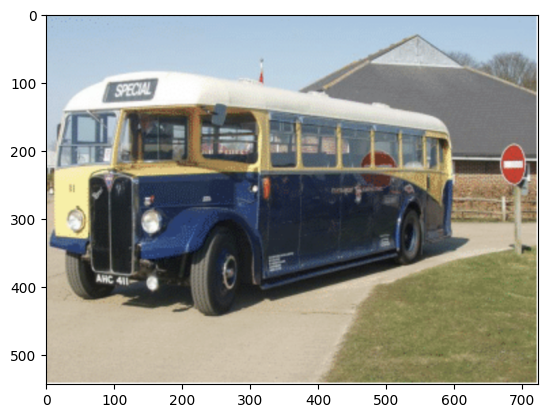

In [4]:
plt.imshow(image)

In [6]:
import pandas as pd
df=pd.read_csv(r'.\Data\metadata_pre.csv')

In [7]:
df

,Unnamed: 0,Image,Question,Answer,File_Name,GIT
0,0,train_0422,Where are liver stem cells (oval cells) located?,in the canals of hering,./Data/Images/img_0001.jpg,unanswerable
1,1,train_0422,What are stained here with an immunohistochemi...,bile duct cells and canals of hering,./Data/Images/img_0001.jpg,unanswerable
2,2,train_0422,What are bile duct cells and canals of Hering ...,an immunohistochemical stain,./Data/Images/img_0001.jpg,12
3,3,train_0422,Are bile duct cells and canals of Hering stain...,yes,./Data/Images/img_0001.jpg,yes
4,4,train_0986,What shows dissolution of the tissue?,an infarct in the brain,./Data/Images/img_0002.jpg,ice cream
...,...,...,...,...,...,...
32627,32627,test_0648,What is present?,kidney,./Data/Images/img_4289.jpg,unanswerable
32628,32628,test_0648,Is kidney present?,yes,./Data/Images/img_4289.jpg,yes
32629,32629,test_0648,What is present?,sarcoidosis,./Data/Images/img_4289.jpg,unanswerable
32630,32630,test_0648,Is sarcoidosis present?,yes,./Data/Images/img_4289.jpg,yes


In [9]:
import torch
print(torch.__version__)
print(torch.cuda.is_available() )

2.0.1+cu118
True


In [11]:
processor = AutoProcessor.from_pretrained("microsoft/git-base-textvqa").to('cuda')
model = AutoModelForCausalLM.from_pretrained("microsoft/git-base-textvqa").to('cuda')

In [14]:
pre_answer=[]
for i in range(df.shape[0]):
    file_path = df['File_Name'].tolist()[i]
    image = Image.open(file_path).convert("RGB")

    pixel_values = processor(images=image, return_tensors="pt").pixel_values.to('cuda')

    question = df['Question'].tolist()[i]
    input_ids = processor(text=question, add_special_tokens=False).input_ids
    input_ids = [processor.tokenizer.cls_token_id] + input_ids
    input_ids = torch.tensor(input_ids).unsqueeze(0).to('cuda')

    generated_ids = model.generate(pixel_values=pixel_values, input_ids=input_ids, max_length=100)
    print(processor.batch_decode(generated_ids, skip_special_tokens=True))
    temp = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].split('? ')
    if len(temp)==2:
        pre_answer.append(temp[1])
    else:
        pre_answer.append('')

['where are liver stem cells ( oval cells ) located? unanswerable']
['what are stained here with an immunohistochemical stain for cytokeratin 7? unanswerable']
['what are bile duct cells and canals of hering stained here with for cytokeratin 7? 12']
['are bile duct cells and canals of hering stained here with an immunohistochemical stain for cytokeratin 7? yes']
['what shows dissolution of the tissue? ice cream']
['what does an infarct in the brain show of the tissue? ice cream']
['does an infarct in the brain show dissolution of the tissue? yes']
['does preserved show dissolution of the tissue? yes']
['what represent foci of fat necrosis with calcium soap formation at sites of lipid breakdown in the mesentery? unanswerable']
['where do areas of white chalky deposits represent foci of fat necrosis with calcium soap formation? pebble']
['what do the areas of white chalky deposits represent? pebble']
['how do the areas of white chalky deposits represent foci of fat necrosis? pebble']
['d

['what consists of a protease, a substrate, and a reaction accelerator assembled on a platelet phospholipid surface? unanswerable']
['what does the initial reaction complex consist of? unanswerable']
['does the initial reaction complex consist of a protease, a substrate, and a reaction accelerator assembled on a platelet phospholipid surface? yes']
['does atrophy of the brain consist of a protease assembled on a platelet phospholipid surface? yes']
['what is stained for elastic tissue? tree']
['is a thrombosed artery stained for elastic tissue? yes']
['what is lodged in a pulmonary artery branch? brown']
['is embolus derived from a lower - extremity deep venous thrombus lodged in a pulmonary artery branch? no']
['is edema lodged in a pulmonary artery branch? yes']
['what is replaced by a large fibrotic scar? the clamp']
['what is the remote kidney infarct replaced by? clamp']
['how is the remote kidney infarct replaced? 5']
['is the remote kidney infarct replaced by a large fibrotic sc

['what does a section of liver stained with congo red reveal in the walls of blood vessels and along sinusoids? unanswerable']
['does a section of liver stained with congo red reveal pink - red deposits of amyloid in the walls of blood vessels and along sinusoids? yes']
['does graft damage reveal pink - red deposits of amyloid in the walls of blood vessels and along sinusoids? yes']
['what are presented in this field? pebble']
['what are small nests of epithelial cells and myxoid stroma forming? unanswerable']
['are small nests of epithelial cells and myxoid stroma forming cartilage and bone presented in this field? yes']
['are cm presented in this field? yes']
['what shows cellular and nuclear variation in size and shape? unanswerable']
['does high - power detailed view of anaplastic tumor cells show cellular and nuclear variation in size and shape? yes']
['do the majority of tissue macrophages show cellular and nuclear variation in size and shape? unanswerable']
['what has an abnorma

['what are scattered among mature hepatocytes in this histologic preparation from an infant with nonimmune hydrops fetalis? unanswerable']
['what are numerous islands of extramedullary hematopoiesis scattered among in this histologic preparation from an infant with nonimmune hydrops fetalis? unanswer']
['are numerous islands of extramedullary hematopoiesis scattered among mature hepatocytes in this histologic preparation from an infant with nonimmune hydrops fetalis? unans']
['are neutrophils scattered among mature hepatocytes in this histologic preparation from an infant with nonimmune hydrops fetalis? unanswerable']
['what is less developed in the neonatal period than it is in adulthood? no text in image']
['is the blood - brain barrier less developed in the neonatal period than it is in adulthood? yes']
['are some long - lived resident tissue macrophages less developed in the neonatal period than they are in adulthood? no']
['what occurs because the blood - brain barrier is less dev

['did bile duct cells and canals of hering mineralize bone in a child with rickets? yes']
['what show distinct nuclear inclusions? unanswerable']
['what do infected cells show? unanswerable']
['do infected cells show distinct nuclear inclusions? yes']
['do energy stores show distinct nuclear inclusions? yes']
['what show diffuse granular cyto - plasm, reflecting accumulated hepatitis b surface antigen hbsag in chronic infections? unanswerable']
['what do infected hepatocytes show, reflecting accumulated hepatitis b surface antigen hbsag in chronic infections? unanswerable']
['do infected hepatocytes show diffuse granular cyto - plasm, reflecting accumulated hepatitis b surface antigen hbsag in chronic infections? no']
['do those with tumors that had mycn amplification show diffuse granular cyto - plasm, reflecting accumulated hepatitis b surface antigen hbsag in chronic infections? no']
['does gram stain preparation of a bronchoalveolar lavage specimen show gram - negative intracellula

['how many cusps have a partial fusion at its center? 4']
['what has a partial fusion at its center? vanilla']
['what does one cusp have at its center? vanilla']
['does one cusp have a partial fusion at its center? yes']
['does margin p have a partial fusion at its center? yes']
['one cusp has a partial fusion at whose center? no']
['one cusp has a partial fusion at whose center? yes']
['is there marked left atrial dilation as seen from above the valve? yes']
['is high - power view of another region marked left atrial dilation as seen from above the valve? yes']
['what is superimposed on chronic rheumatic heart disease? unanswerable']
['what is acute rheumatic mitral valvulitis superimposed on? unanswerable']
['is acute rheumatic mitral valvulitis superimposed on chronic rheumatic heart disease? yes']
['is granulation tissue superimposed on chronic rheumatic heart disease? yes']
['what are visible along the line of closure of the mitral valve leaflets? pastries']
['where are small vege

['do those with tumors that had mycn amplification contain several fragmented red cells? yes']
['what stands out in contrast? unanswerable']
['does scattered, fully hemoglobinized cells, from a recent blood transfusion, stand out in contrast? no']
['do the principal cellular alterations that characterize reversible cell injury and necrosis stand out in contrast? yes']
['what results for the all are shown in the figure? unanswerable']
['does the absence of staining result for the all shown in the figure? yes']
['what are positive for the b cell markers cd19 and cd22? unanswerable']
['is cd10 a marker expressed on a subset of alls, and tdt a specialized dna polymerase that is expressed in pre - b and pre - t cells? yes']
['are the tumor cells positive for the b cell markers cd19 and cd22? yes']
['is this specimen from a patient with hemolytic uremic syndrome positive for the b cell markers cd19 and cd22? yes']
['what shows diffuse effacement of nodal architecture? u. s. a.']
['does the l

['are t _ h 17 cells in granuloma formation present? yes']
['are loosely formed interstitial granulomas and chronic inflammation characteristic? yes']
['are histologic features characteristic? yes']
['where is the accumulation of large numbers of macrophages? unanswerable']
['what is there of large numbers of macrophages within the alveolar spaces with only slight fibrous thickening of the alveolar walls? no']
['is there accumulation of large numbers of macrophages within the alveolar spaces with only slight fibrous thickening of the alveolar walls? yes']
['what has been stained with prussian blue, an iron stain that highlights the abundant intracellular hemo - siderin? unanswerable']
['what has the tissue been stained with? unanswerable']
['has the tissue been stained with prussian blue, an iron stain that highlights the abundant intracellular hemo - siderin? yes']
['has the acute myocardial infarct of the posterolateral left ventricle been stained with prussian blue, an iron stain th

['what is markedly enlarged? answering does not require reading text in the image']
['is the kidney markedly enlarged? yes']
['is libman - sacks endocarditis markedly enlarged? yes']
['what is shown for scale? quartz']
['what is centimeter rule shown for? unanswerable']
['is centimeter rule shown for scale? yes']
['is numerous friable mural thrombi shown for scale? yes']
['what is markedly enlarged? unanswerable']
['is the kidney markedly enlarged? yes']
['is remote kidney infarct markedly enlarged? yes']
['what is striking? planet earth']
['is the angiogram striking? yes']
['is the cut surface striking? yes']
['what is more commonly used to identify varices? planet earth']
['what is endoscopy more commonly used to? planet earth']
['is endoscopy more commonly used to identify varices? yes']
['is a uncleolar pattern more commonly used to identify varices? yes']
['what are present in this postmortem specimen corresponding to the angiogram in the figure? unanswerable']
['where are collaps

['are normal media for comparison dense and prominent? yes']
['what is there in acute hepatitis? unanswerable']
['is there very little portal mononuclear infiltration in acute hepatitis or sometimes none at all? yes']
['is the left atrium very little portal mononuclear infiltration in acute hepatitis or sometimes none at all? yes']
['what shows characteristic portal tract expansion by a dense lymphoid infiltrate? unanswerable']
['what did chronic viral hepatitis due to hcv show? unanswerable']
['how did chronic viral hepatitis due to hcv show characteristic portal tract expansion? answering does not require reading text in the image']
['does chronic viral hepatitis due to hcv show characteristic portal tract expansion by a dense lymphoid infiltrate? yes']
['does reversibly injured myocardium show characteristic portal tract expansion by a dense lymphoid infiltrate? yes']
['what is associated with chronic alcohol use? brain']
['what is fatty liver disease associated with? unanswerable']

['do testicular teratomas contain mature cells from endodermal, mesodermal, and ectodermal lines? yes']
['do two small pulmonary arterioles contain mature cells from endodermal, mesodermal, and ectodermal lines? yes']
['what demonstrates a well - demarcated nodule at the right of the field, with a portion of urethra seen to the left? blackberry']
['how does low - power photomicrograph demonstrate a well - demarcated nodule at the right of the field? unanswerable']
['does low - power photomicrograph demonstrate a well - demarcated nodule at the right of the field, with a portion of urethra seen to the left? yes']
['does four - chamber dilation and hypertrophy demonstrate a well - demarcated nodule at the right of the field, with a portion of urethra seen to the left?']
['what is caused predominantly by stromal, rather than glandular, proliferation in other cases of nodular hyperplasia? unanswerable']
['what is the nodularity caused by in other cases of nodular hyperplasia? unanswerable'

['what distorts the glandular tissue, forming cleftlike spaces, and bulges into surrounding stroma? unanswerable']
['what do proliferating stromal cells distort? unanswerable']
['do proliferating stromal cells distort the glandular tissue, forming cleftlike spaces, and bulge into surrounding stroma? yes']
['do carcinoid tumors distort the glandular tissue, forming cleftlike spaces, and bulge into surrounding stroma? yes']
['what is shown that is a common feature of nonproliferative breast disease? unanswerable']
['what is an apocrine cyst? unanswerable']
['is an apocrine cyst a common feature of nonproliferative breast disease? yes']
['is the prominent cell in the center field a common feature of nonproliferative breast disease? yes']
['what leads to er - positive cancers? schropica']
['does the most common pathway lead to er - positive cancers? no']
['does two helical spirochetes lead to er - positive cancers? yes']
['what include flat epithelial atypia, adh, and dcis, all of which sh

['what is obtained by fine - needle aspiration of a papillary carcinoma? unanswerable']
['how are cells obtained? answering does not require reading text in the image']
['are cells obtained by fine - needle aspiration of a papillary carcinoma? yes']
['what are visible in some of the aspirated cells? unanswerable']
['how are characteristic intranuclear inclusions? unanswerable']
['are characteristic intranuclear inclusions visible in some of the aspirated cells? yes']
['is wilms tumor visible in some of the aspirated cells? yes']
['what demonstrate capsular invasion that may be minimal, as in this case, or widespread, with extension into local structures of the neck by contrast? the white wall']
['what do follicular carcinomas demonstrate? unanswerable']
['do follicular carcinomas demonstrate capsular invasion that may be minimal, as in this case, or widespread, with extension into local structures of the neck by contrast? yes']
['do iron deposits shown by a special staining process dem

['what has the histologic appearance of disorganized growth plate - like cartilage? unanswerable']
['what does the cartilage cap have? i']
['does the cartilage cap have the histologic appearance of disorganized growth plate - like cartilage? yes']
['does this abnormality have the histologic appearance of disorganized growth plate - like cartilage? yes']
['what is predominantly lytic, expansile with destruction of the cortex? 50']
['is giant cell tumor of the proximal fibula predominantly lytic, expansile with destruction of the cortex? no']
['is collagen predominantly lytic, expansile with destruction of the cortex? no']
['what is also present? dia']
['is a pathologic fracture also present? yes']
['is focal anaplasia also present? yes']
['what shows eccentric aneurysmal bone cyst of tibia? unanswerable']
['does coronal computed axial tomography scan show eccentric aneurysmal bone cyst of tibia? yes']
['does the transmural light area in the posterolateral left ventricle scan show eccent

['is a brown stain in normal muscle seen? yes']
['is this abnormality stain in normal muscle seen? yes']
['what shows a complete absence of membrane - associated dystrophin, seen as a brown stain in normal muscle inset in ( b )? no']
['what does immunohistochemical staining show? unanswerable']
['does immunohistochemical staining show a complete absence of membrane - associated dystrophin, seen as a brown stain in normal muscle inset in ( b )? no']
['what illustrates disease progression, which is marked by extensive variation in myofiber size, fatty replacement, and endomysial fibrosis in ( c )? unanswerable']
['what does the biopsy from the older brother illustrate? unanswerable']
['does the biopsy from the older brother illustrate disease progression, which is marked by extensive variation in myofiber size, fatty replacement, and endomysial fibrosis in ( c )? unans']
['does gland illustrate disease progression, which is marked by extensive variation in myofiber size, fatty replacemen

['is an intranuclear inclusion in a cortical neuron strongly immunoreactive for ubiquitin? yes']
['what have round nuclei, often with a clear cytoplasmic halo in oligodendroglioma? yes']
['what do tumor cells have in oligodendroglioma? unanswerable']
['how do tumor cells have round nuclei? yes']
['do tumor cells have round nuclei, often with a clear cytoplasmic halo in oligodendroglioma? yes']
['do lymphoid aggregates with germinal centers and abundant subepi - thelial plasma cells within the superficial lamina propria have round nuclei, often with a clear cytoplasmic halo in oligodendroglioma? yes']
['what is attached to the dura with compression of underlying brain? brain']
["what is parasagittal multilobular meningioma attached to? l '"]
['how is parasagittal multilobular meningioma attached? unanswerable']
['is parasagittal multilobular meningioma attached to the dura with compression of underlying brain? yes']
['is a pacemaker attached to the dura with compression of underlying br

['how many phases are in premitotic phases? 4']
['what are premitotic phases while m phase is accomplished in 4 sequential stages : prophase, metaphase, anaphase, and telophase? unanswerable']
['are premitotic phases the g1, s and g2 phase while m phase is accomplished in 4 sequential stages : prophase, metaphase, anaphase, and telophase? yes']
['are m phase the g1, s and g2 phase while m phase is accomplished in 4 sequential stages : prophase, metaphase, anaphase, and telophase? yes']
['how many daughter cells are formed which may continue to remain in the cell cycle or go out of it in resting phase interphase, the g0 phase on completion of cell division? 4']
['what are formed which may continue to remain in the cell cycle or go out of it in resting phase interphase, the g0 phase on completion of cell division? unanswerable']
['how are two daughter cells formed? unanswerable']
['are two daughter cells formed which may continue to remain in the cell cycle or go out of it in resting pha

['what show granular debris? ice']
['what do the nuclei show? unanswerable']
['do the nuclei show granular debris? yes']
['do the tubular epithelial cells show granular debris? yes']
['what shows non - specific chronic inflammation and proliferating vessels? unanswerable']
['what does the interface between viable and non - viable area show? unanswerable']
['does the interface between viable and non - viable area show non - specific chronic inflammation and proliferating vessels? yes']
['does the show non - specific chronic inflammation and proliferating vessels? yes']
['what shows granulomatous inflammation? pink']
['what does the periphery show? specsavers']
['does the periphery show granulomatous inflammation? yes']
['what is there? pink']
['what is there eosinophilic, amorphous, granular? futurtium']
['is there eosinophilic, amorphous, granular material, while the periphery shows granulomatous inflammation? no']
['what shows granulation tissue and gliosis? anthropica']
['what does t

['what contain heart failure cells alveolar macrophages containing haemosiderin pigment? unanswerable']
['what do the alveolar lumina contain failure cells alveolar macrophages containing haemosiderin pigment? unanswerable']
['do the alveolar lumina contain heart failure cells alveolar macrophages containing haemosiderin pigment? yes']
['do line of demarcation between gangrenous segment and the viable bowel contain heart failure cells alveolar macrophages containing haemosiderin pigment? unanswerable']
['what shows mild fatty change of liver cells? unanswerable']
['what does the peripheral zone show? ice']
['does the peripheral zone show mild fatty change of liver cells? yes']
['does the pink acellular amyloid material show mild fatty change of liver cells? yes']
['what shows marked degeneration and necrosis of hepatocytes accompanied by haemorrhage while the peripheral zone shows mild fatty change of liver cells? unanswerable']
['what does the centrilobular zone show? ice']
['does the

['what is the centre composed of? raspberry']
["is the centre composed of granular caseation necrosis, surrounded by epithelioid cells and langhans'giant cells and peripheral rim of lymphocytes bounded by fibroblasts in fully formed granuloma? yes"]
["is electron microscopy composed of granular caseation necrosis, surrounded by epithelioid cells and langhans'giant cells and peripheral rim of lymphocytes bounded by fibroblasts in fully formed granuloma? yes"]
['what shows merging capsules and large areas of caseation necrosis? unanswerable']
['does section of matted mass of lymph nodes show merging capsules and large areas of caseation necrosis? no']
['does the nuclei show merging capsules and large areas of caseation necrosis? yes']
['what does cut section of matted mass of lymph nodes show? h']
['does a cut section of matted mass of lymph nodes show merging capsules and large areas of caseation necrosis? no']
['does sectioned slice of the liver cut section of matted mass of lymph node

['are characteristics of cancer in a gland contrasted with the appearance of an acinus? unanswerable']
['are premitotic phases contrasted with the appearance of an acinus? yes']
['what begins by lodgement of tumour cells in subcapsular sinus via afferent lymphatics entering at the convex surface of the lymph node?']
['what does lymphatic spread begin by? unanswerable']
['does lymphatic spread begin by lodgement of tumour cells in subcapsular sinus via afferent lymphatics entering at the convex surface of the lymph node? unans']
['does uppurative diseases begin by lodgement of tumour cells in subcapsular sinus via afferent lymphatics entering at the convex surface of the lymph node? unans']
['what shows replacement of slaty - grey spongy parenchyma with multiple, firm, grey - white nodular masses, some having areas of haemorhages and necrosis? unans']
['what does sectioned surface of the lung show? unanswerable']
['how does sectioned surface of the lung show replacement of slaty - grey 

['what are shown bold? unanswerable']
['are the two red cell enzyme defects, glucose - 6 phosphate dehydrogenase and pyruvate kinase, shown bold? unanswerable']
['are other components of virion shown bold? yes']
['what did osmotic fragility testing beta - thalassaemia major show? yes']
['did smotic fragility testing beta - thalassaemia major show decreased fragility? yes']
['did the surrounding zone decrease fragility? yes']
['what in aplastic anaemia is contrasted against normal cellular marrow? unanswerable']
['what is contrasted against normal cellular marrow? unanswerable']
['what is bone marrow trephine biopsy in aplastic anaemia contrasted against? unanswerable']
['is one marrow trephine biopsy in aplastic anaemia contrasted against normal cellular marrow? yes']
['is integration of viral genome into the host cell genome contrasted against normal cellular marrow? yes']
['what shows suppression of myeloid and erythroid cells and replacement of haematopoetic elements by fat in aplas

['do a few have ulcerated surface? yes']
['do the shift of the curve to higher oxygen delivery have ulcerated surface? no']
['what are narrowed by the atherosclerotic process? unanswerable']
['what are orifices of some of the branches coming out of the wall narrowed by? rough terrain']
['are orifices of some of the branches coming out of the wall narrowed by the atherosclerotic process? no']
['are right sideshows smoking - related neoplastic diseases while left side indicates non - neoplastic diseases associated with smoking, narrowed by the atherosclerotic process? una']
['what shows fibrinoid necrosis surrounded by viable as well as fragmented neutrophils? unanswerable']
['what does the vessel wall show? purple']
['does the vessel wall show fibrinoid necrosis surrounded by viable as well as fragmented neutrophils? yes']
['does the dna virus show fibrinoid necrosis surrounded by viable as well as fragmented neutrophils? yes']
['what is there? unanswerable']
['is there acute panarterit

['does etastatic carcinomatous deposits in the show healed aschoff nodules in the interstitium having collagen, sparse cellula rity, a multinucleate giant cell and anitschkow cells? unans']
['what shows an anitschkow cell in cross section and in longitudinal section ls? lg']
['where does inbox show an anitschkow cell? lg']
['what does inbox show in cross section and in longitudinal section? lg']
['does inbox show an anitschkow cell in cross section and in longitudinal section? yes']
['does 2 and 3 show an anitschkow cell in cross section and in longitudinal section? yes']
['where are vegetations? crab']
['what are shown on the mitral valve are shown as seen from the left ventricle? crab']
['what are the vegetations shown on? crab']
['are the vegetations shown on the mitral valve are shown as seen from the left ventricle? yes']
['are cells shown on the mitral valve are shown as seen from the left ventricle? yes']
['what shows fibrin cap on luminal surface, layer of bacteria, and deeper 

['is an asbestos body an asbestos fibre coated with glycoprotein and haemosiderin giving it beaded or dumbbell - shaped appearance with bulbous ends? yes']
['is the interstitial vasculature an asbestos fibre coated with glycoprotein and haemosiderin giving it beaded or dumbbell - shaped appearance with bulbous ends? unans']
['sectioned surface shows grey - white fleshy tumour in the bronchus at whose bifurcation? no']
['what shows grey - white fleshy tumour in the bronchus at its bifurcation? unanswerable']
['what does sectioned surface show? climbing']
['does sectioned surface show grey - white fleshy tumour in the bronchus at its bifurcation? yes']
['does the kidney show grey - white fleshy tumour in the bronchus at its bifurcation? yes']
['what is seen extending directly into adjacent lung parenchyma and hilar nodes? unanswerable']
['is the tumour seen extending directly into adjacent lung parenchyma and hilar nodes? yes']
['is congo red seen extending directly into adjacent lung pa

['do defects in any of the six show features of cytologic atypia and mitosis? unanswerable']
['what is increased? answering does not require reading text in the image']
['is the number of layers increased? answering does not require reading text in the image']
['is the pleural surface of the specimen of the lung increased? yes']
['what is there across the basement membrane? unanswerable']
['is there no invasion across the basement membrane? yes']
['is formation of granulation tissue no invasion across the basement membrane? yes']
['what is densely infiltrated by chronic inflammatory cells, chiefly lymphocytes, plasma cells and macrophages? unanswerable']
['what is the cyst wall densely infiltrated by? unanswerable']
['is the cyst wall densely infiltrated by chronic inflammatory cells, chiefly lymphocytes, plasma cells and macrophages? yes']
['is normal non - activated platelet, having open canalicular system and the cytoplasmic organelles densely infiltrated by chronic inflammatory cel

['what does external surface show? unanswerable']
['does external surface show increased mesenteric fat, thickened wall and narrow lumen? yes']
['does aboratory findings of itp show increased mesenteric fat, thickened wall and narrow lumen? yes']
['what shows segment of thickened wall with narrow lumen which is better appreciated in cross section while intervening areas of the bowel are uninvolved or skipped?']
['what does luminal surface of longitudinal cut section show? cat']
['how does luminal surface of longitudinal cut section show segment of thickened wall? no']
['does luminal surface of longitudinal cut section show segment of thickened wall with narrow lumen which is better appreciated in cross section while intervening areas of the bowel are uninvolved or skipped? no']
['does the corresponding area show segment of thickened wall with narrow lumen which is better appreciated in cross section while intervening areas of the bowel are uninvolved or skipped?']
['what are superficia

['is the portal tract expanded due to increased lymphomononuclear inflammatory cells which are seen to breach the limiting plate ie? unanswerable']
['is congo red expanded due to increased lymphomononuclear inflammatory cells which are seen to breach the limiting plate ie? unanswerable']
['what are destroyed? unanswerable']
['are hepatocytes at the interface of portal tract and lobule destroyed? yes']
['are the mature red cells destroyed? yes']
['what is irregular and necrotic? unanswerable']
["is amoebic liver abscess's wall irregular and necrotic? yes"]
['is the centre irregular and necrotic? yes']
['what is commonly solitary? unanswerable']
['is moebic liver abscess commonly solitary? yes']
['is peripheral blood film showing marked neutrophilic leucocytosis commonly solitary? yes']
['what is composed of whitish membrane resembling the membrane of a hard boiled egg? answering does not require reading text in the image']
['what is the cyst wall composed of? answering does not require 

['what shows tiny petechial haemorrhages visible through the capsule? unanswerable']
['what does the cortex show visible through the capsule? unanswerable']
['does the cortex show tiny petechial haemorrhages visible through the capsule? yes']
['does bilayer lipid membrane show tiny petechial haemorrhages visible through the capsule? yes']
["what are crescents in bowman's space forming? x2"]
["what are there in bowman's space forming adhesions between the glomerular tuft and bowman's capsule? x"]
["are there crescents in bowman's space forming adhesions between the glomerular tuft and bowman's capsule? yes"]
["are'triple response'crescents in bowman's space forming adhesions between the glomerular tuft and bowman's capsule? yes"]
['what shows hypercellularity and leucocytic infiltration? x2']
['what does the tuft show? h & m']
['does the tuft show hypercellularity and leucocytic infiltration? yes']
['does the cyst wall show hypercellularity and leucocytic infiltration? yes']
['what show

['is the infiltrate in the lumina enlarged in size and weight? yes']
["what shows characteristic'flea bitten kidney'due to tiny petechial haemorrhages on the surface? unanswerable"]
['what does the cortex show? gimp']
["does the cortex show characteristic'flea bitten kidney'due to tiny petechial haemorrhages on the surface? yes"]
["does the silicotic nodule show characteristic'flea bitten kidney'due to tiny petechial haemorrhages on the surface? yes"]
['what is enlarged and heavy? glasses']
['what is with chronic pyelonephritis? unanswerable']
['is the kidney enlarged and heavy? yes']
['is thalassaemia and hbd enlarged and heavy? yes']
['what shows dilated pelvicalyceal system with atrophied and thin peripheral cortex? polaroid']
['does sectioned surface show dilated pelvicalyceal system with atrophied and thin peripheral cortex? yes']
['does bdominal fat aspirate stained with congo red show dilated pelvicalyceal system with atrophied and thin peripheral cortex? no']
['what contains a 

['does sectioned surface show replacement of the entire testis by variegated mass having grey - white solid areas, cystic areas, honey - combed areas and foci of cartilage and bone? unans']
['does peripheral blood in itp show replacement of the entire testis by variegated mass having grey - white solid areas, cystic areas, honey - combed areas and foci of cartilage and bone? unans']
['what shows a variety of incompletely differentiated tissue elements? pebble']
['what does microscopy show? unanswerable']
['does microscopy show a variety of incompletely differentiated tissue elements? yes']
['does the scarred area show a variety of incompletely differentiated tissue elements? yes']
['what shows whorls of malignant squamous cells with central keratin pearls? unanswerable']
['does microscopy show whorls of malignant squamous cells with central keratin pearls? yes']
['does the deposition show whorls of malignant squamous cells with central keratin pearls? yes']
['what shows a cauliflower g

['what does the opened up uterine cavity show? the brain']
['how does the opened up uterine cavity show an intrauterine gestation sac? the brain']
['does the opened up uterine cavity show an intrauterine gestation sac with placenta having grey - white whorled pattern? no']
['does various types of epithelial cells show an intrauterine gestation sac with placenta having grey - white whorled pattern? no']
['what include stratification of low columnar epithelium lining the inner surface of the cyst and a few psammoma bodies? unanswerable']
['what do microscopic features include? unanswerable']
['do microscopic features include stratification of low columnar epithelium lining the inner surface of the cyst and a few psammoma bodies? no']
['do the capillary walls include stratification of low columnar epithelium lining the inner surface of the cyst and a few psammoma bodies? yes']
['what shows invasion by clusters of anaplastic tumour cells? unanswerable']
['what does the stroma show by clust

['what are in the epidermal layers containing large tumour cells? embellished']
['are clefts in the epidermal layers containing large tumour cells? yes']
['are these cases clefts in the epidermal layers containing large tumour cells? yes']
['what is crusted and ulcerated? pink']
['is the region of nipple and areola crusted and ulcerated? yes']
['is stanford type crusted and ulcerated? yes']
['what show nuclear positivity with er and pr antibody immunostains? unanswerable']
['what do the tumour cells show with er and pr antibody immunostains? unanswerable']
['how do the tumour cells show nuclear positivity? unanswerable']
['do the tumour cells show nuclear positivity with er and pr antibody immunostains? yes']
['do typhoid ulcers in the small intestine show nuclear positivity with er and pr antibody immunostains? yes']
['what is identified in a section of the normal skin? unanswerable']
['where is main structures identified in? unanswerable']
['is main structures identified in a section

['what are the masses of tumour cells separated from? unanswerable']
['are the masses of tumour cells separated from dermal collagen by a space called shrinkage artefact? yes']
['are cells separated from dermal collagen by a space called shrinkage artefact? yes']
['what shows islands and lobules within the dermis which are composed of two types of cells : outer basophilic cells and inner shadow cells? unanswerable']
['how many types does the tumour show? 4']
['what does the tumour show? pebble']
['does the tumour show islands and lobules within the dermis which are composed of two types of cells : outer basophilic cells and inner shadow cells? unanswerable']
['what are also seen? pebble']
['are areas of calcification also seen? no']
['are the air spaces also seen? yes']
['what is coarse and irregular? 100x0x0']
['is melanin pigment in naevus cells coarse and irregular? yes']
['are the individual cells in layers coarse and irregular? yes']
['is an elevated blackish ulcerated area with i

['are the functional divisions of the lobule into 3 zones also seen? yes']
['what shows a solitary nodule having capsule? a fist']
['what does sectioned surface of the thyroid show? fist']
['does sectioned surface of the thyroid show a solitary nodule having capsule? yes']
['does the epidermis show a solitary nodule having capsule? yes']
['what shows a solitary nodule having capsule? toothpick']
['what does sectioned surface of the thyroid show? bottom left']
['does sectioned surface of the thyroid show a solitary nodule having capsule? yes']
['does the silicotic nodule show a solitary nodule having capsule? yes']
['what shows a single nodule separated from the rest of thyroid parenchyma by incomplete fibrous septa? yes']
['what does cut surface of the enlarged thyroid gland show? bullet']
['does cut surface of the enlarged thyroid gland show a single nodule separated from the rest of thyroid parenchyma by incomplete fibrous septa? yes']
['does the border of the elevated lesion at the 

['are the tumour cells quite variable in size having characteristic bubbly cytoplasm and anisonucleocytosis? no text in image']
['what is myxoid? img']
['is the background myxoid? unanswerable']
['what is surrounded by inflammatory cells, fibroblasts and occasional giant cells? unanswerable']
['what is gouty tophus, showing central aggregates of urate crystals surrounded by? tiny blueberries']
['how is gouty tophus, showing central aggregates of urate crystals surrounded? answering does not require reading text in the image']
['is gouty tophus, showing central aggregates of urate crystals surrounded by inflammatory cells, fibroblasts and occasional giant cells? yes']
['what shows infiltrate of small oval to spindled histiocytes with numerous interspersed multinucleate giant cells lyning in a background of fibrous tissue? unanswerable']
['what does the tumour show? pheasant']
['how does the tumour show? unanswerable']
['does the tumour show infiltrate of small oval to spindled histiocyt

['what is present? cinnamon']
['is abdomen present? yes']
['where is this area in the body? cinnamon']
['what is present? cinnamon']
["what does this image show? a man's brain"]
['does this image show a whole body photo? yes']
['what is present? a baby']
['is abdomen present? yes']
['what is present? a baby']
['is omphalocele present? yes']
['is abdomen present? yes']
['where is this area in the body? unanswerable']
['what is present? a baby']
['what is present? a baby']
['what does this image show? 1. 1']
['does this image show fixed tissue? yes']
['what is present? 1. 1']
['is abdomen present? yes']
['what is present? 1. 1']
['is omentum present? yes']
['is omphalocele present? yes']
['what is present? 1. 1']
['is tuberculosis present? yes']
['where is this area in the body? 1 / 1']
['what is present? 1. 1']
['what is present? 1. 1']
['what is present? 1. 1']
['what see other slides? pig meat']
['what does an opened peritoneal cavity cause by fibrous band strangulation see? pig']
['d

['what is this very typical? unanswerable']
['what is present? unanswerable']
['how is this abscess material very typical? unanswerable']
['how is this cold abscess material? unanswerable']
['what contains granulomata slide is a close - up view of the typical cold abscess exudate on the liver surface? unanswerable']
['what does slices of liver and spleen typical tuberculous exudate is present on capsule of liver and spleen contain? unanswerable']
['what does this image show? unanswerable']
['what is a close - up view of the typical cold abscess exudate on the liver surface? unanswerable']
['what is granulomata slide typical cold abscess exudate on the liver surface? unanswerable']
['is granulomata slide a close - up view of the typical cold abscess exudate on the liver surface? yes']
['what is present on capsule of liver and spleen? unanswerable']
['what is typical tuberculous exudate of liver and spleen? unanswerable']
['is typical tuberculous exudate present on capsule of liver and s

['does peritoneal fluid show pneumotosis intestinalis with rupture and hemorrhage in a patient with hyaline membrane disease? yes']
['where is this area in the body? unanswerable']
['what does this image show? hospital']
['does this image show ascites? yes']
['does omentum show ascites? yes']
['what is present? hospital']
['is abdomen present? yes']
['is slices of liver and spleen typical tuberculous exudate is present on capsule of liver and spleen present? yes']
['where is this area in the body? hospital']
['what is present? hospital']
['what does this image show? donuts']
['does this image show ascites? yes']
['does carcinomatosis show ascites? yes']
['what is present? donuts']
['is abdomen present? yes']
['is slices of liver and spleen typical tuberculous exudate is present on capsule of liver and spleen present? yes']
['where is this area in the body? unanswerable']
['what is present? donuts']
['what does this image show? eye']
['does this image show polyarteritis nodosa mesentari

['what is present? 5 inches']
['what does this image show? baby']
['does this image show anterior lateral view of this monster? yes']
['what is present? baby']
['is conjoined twins cephalothoracopagus janiceps present? yes']
['what is present? baby']
['what does this image show? baby']
['does this image show newborn infant 24 week gestation weight gm typical grotesque appearance? yes']
['what is present? baby']
['is lymphangiomatosis generalized present? yes']
['what is present? baby']
['what does this image show? unanswerable']
['does this image show posterior view of body slide? yes']
['what is present? unanswerable']
['is lymphangiomatosis generalized present? yes']
['what is present? unanswerable']
['what does this image show? monkey']
['does this image show conjoined twins at head and chest? yes']
['what is present? monkey']
['is cephalothoracopagus janiceps present? yes']
['what is present? monkey']
['what joined at head facing each other? baby']
['what is twins joined? baby']
['

['what excised breast with large ulcerating carcinoma? e. a.']
['what is close - up excised? measuring']
['how is close - up excised breast with ulcerating carcinoma? yes']
['what does this image show? cm']
['does this image show huge ulcerating carcinoma surgical specimen? yes']
['does peritoneum show huge ulcerating carcinoma surgical specimen? yes']
['what is present? cm']
['is breast present? yes']
['is all the fat necrosis present? yes']
['what is present? cm']
['is adenocarcinoma present? yes']
['is abdomen present? yes']
['where is this area in the body? lagero']
['what is present? cm']
['what is present? cm']
['what does this image show? measuring tape']
['does this image show large ulcerating carcinoma surgical specimen? yes']
['does surface show large ulcerating carcinoma surgical specimen? yes']
['what is present? measuring tape']
['is breast present? yes']
['is leiomyosarcoma present? yes']
['where is this area in the body? muscata']
['what is present? measuring tape']
['wh

['how does this image show metastatic choriocarcinoma? unanswerable']
['does this image show metastatic choriocarcinoma with pleomorphism? yes']
['does case of peritonitis slide show metastatic choriocarcinoma with pleomorphism? unans']
['what is present? pebble']
['is breast present? yes']
['is mesentery present? yes']
['what is present? pebble']
['is metastatic carcinoma present? yes']
['is typical tuberculous exudate present? yes']
['where is this area in the body? pebble']
['what sickled red cells in vessels well shown? pebble']
['what is metastatic choriocarcinoma with pleomorphism and mitotic figures sickled? unanswerable']
['what is present? pebble']
['what is present? pebble']
['what does this image show? crab']
['how does this image show mastectomy scars? unanswerable']
['does this image show mastectomy scars with skin metastases? yes']
['does carcinomatosis show mastectomy scars with skin metastases? yes']
['what is present? crab']
['is breast present? yes']
['is typical tube

['what does this image show? unanswerable']
['does this image show rabbit foam cell with pseudopod extending through endothelium into lumen presumably exiting the aorta? yes']
['what is present? unanswerable']
['is cardiovascular present? yes']
['what is present? unanswerable']
['is aorta present? yes']
['what is present? unanswerable']
['is atherosclerosis present? yes']
['where is this? unanswerable']
['what is present? unanswerable']
['what is present? unanswerable']
['what is present? unanswerable']
['what does this image show? crab']
['does this image show monocyte in intima? yes']
['what is present? crab']
['is cardiovascular present? yes']
['what is present? crab']
['is vasculature present? yes']
['what is present? crab']
['is coronary artery present? yes']
['where is this? sea turtle']
['what is present? crab']
['what is present? crab']
['what is present? crab']
['what does this image show? ice']
['does this image show monocyte in intima? yes']
['what is present? ice']
['is car

['does this image show heart, myocardial infarction, surgery to repair interventricular septum rupture? yes']
['what is present? roses']
['is cardiovascular present? yes']
['where is this? flowers']
['what is present? roses']
['what does this image show? peony']
['does this image show heart, hypertrophy, chronic rheumatic heart disease with prosthetic mitral valve? yes']
['what is present? chocolate']
['is cardiovascular present? yes']
['where is this? unanswerable']
['what is present? chocolate']
['what does this image show? peaches']
['does this image show heart, hypertrophy, chronic rheumatic heart disease with prosthetic mitral valve? yes']
['what is present? peach']
['is cardiovascular present? yes']
['where is this? pinkish']
['what is present? peach']
['what does this image show? apple pie']
['what is present? apple pie']
['where is this? unanswerable']
['what is present? apple pie']
['what does this image show? oopolo']
['what is present? unanswerable']
['where is this? unanswe

['where is this? unanswerable']
["what is present? o'o"]
['what does this image show? unanswerable']
['does this image show heart, coronary artery, atherosclerosis? yes']
['does infant body show heart, coronary artery, atherosclerosis? yes']
['what is present? unanswerable']
['is cardiovascular present? yes']
['is adenocarcinoma present? yes']
['where is this? unanswerable']
['what is present? unanswerable']
['what does this image show? heart']
['does this image show heart, anterior surface, acute posterior myocardial infarction? yes']
['does retroperitoneum show heart, anterior surface, acute posterior myocardial infarction? yes']
['what is present? heart']
['is cardiovascular present? yes']
['is slide present? yes']
['where is this? a heart']
['what is present? heart']
['what does this image show? tooth']
['does this image show heart, posterior surface, acute posterior myocardial infarction? yes']
['does myocardium show heart, posterior surface, acute posterior myocardial infarction?

['what does this image show? pink']
['does this image show heart, myocardial infarction, wavey fiber change, necrtosis, hemorrhage, and dissection? yes']
['does quite good liver show heart, myocardial infarction, wavey fiber change, necrtosis, hemorrhage, and dissection? yes']
['what is present? pink']
['is cardiovascular present? yes']
['is atrophy present? yes']
['where is this from? old city hall']
['what is present? pink']
['what does this image show? water']
['does this image show heart, myocardial infarction, wavey fiber change, necrtosis, hemorrhage, and dissection? unanswerable']
['does polycystic disease show heart, myocardial infarction, wavey fiber change, necrtosis, hemorrhage, and dissection? unanswerable']
['what is present? unanswerable']
['is cardiovascular present? yes']
['is an opened peritoneal cavity cause by fibrous band strangulation present? yes']
['where is this from? the city of pink']
['what is present? unanswerable']
['what does this image show? clumps of peb

['what is present? unanswerable']
['what does this image show? duck']
['does this image show atherosclerosis? yes']
['does chronic ischemia show atherosclerosis? yes']
['what is present? duck']
['is cardiovascular present? yes']
['is cachexia present? yes']
['what is present? duck']
['is vasculature present? yes']
['is surface present? yes']
['where is this in? pebble']
['what left anterior descending coronary artery? duck']
['what is atherosclerosis left? duck']
['what is present? duck']
['what is present? duck']
['how is atherosclerosis left anterior descending artery? yes']
['what does this image show? pink']
['does this image show ruptured saccular aneurysm right middle cerebral artery? yes']
['does polycystic disease show ruptured saccular aneurysm right middle cerebral artery? yes']
['what is present? pink']
['is cardiovascular present? yes']
['is macerated stillborn present? yes']
['what is present? pink']
['is vasculature present? yes']
['is lateral view present? yes']
['where 

['what is present? ice cream']
['is cardiovascular present? yes']
['is heart present? yes']
['where is this in? almond milk']
['what is present? ice cream']
['what does this image show? pink']
['does this image show heart, microthrombi, thrombotic thrombocytopenic purpura? yes']
['does fibrinous peritonitis show heart, microthrombi, thrombotic thrombocytopenic purpura? yes']
['what is present? pink']
['is cardiovascular present? yes']
['is nipple duplication present? yes']
['where is this in? pink']
['what is present? pink']
['what does this image show? donut']
['does this image show leg veins, thrombus? yes']
['does capillary show leg veins, thrombus? yes']
['what is present? donut']
['is cardiovascular present? yes']
['is abdomen present? yes']
['what is present? donut']
['is vasculature present? yes']
['is beckwith - wiedemann syndrome present? yes']
['where is this from? donut']
['what is present? donut']
['what is present? donut']
['what does this image show? water']
['does this i

['what is present? pink']
['is vasculature present? yes']
['is amyloidosis present? yes']
['where is this from? pink']
['what is present? pink']
['what is present? pink']
['what does this image show? pink']
['does this image show vasculitis, polyarteritis nodosa? yes']
['does cranial artery show vasculitis, polyarteritis nodosa? yes']
['what is present? pinkish pink']
['is cardiovascular present? yes']
['is fat necrosis present? yes']
['what is present? pinkish pink']
['is vasculature present? yes']
['is lower chest and abdomen anterior present? yes']
['where is this from? pink rock']
['what is present? pinkish pink']
['what is present? pinkish pink']
['what does this image show? pinkish pink']
['does this image show vasculitis, polyarteritis nodosa? yes']
['does marked show vasculitis, polyarteritis nodosa? yes']
['what is present? pinkish pink']
['is cardiovascular present? yes']
['is this image present? yes']
['what is present? pinkish pink']
['is vasculature present? yes']
['is car

['what does this image show? unanswerable']
['does this image show vasculitis? yes']
['does cranial artery show vasculitis? yes']
['what spotted fever, immunoperoxidase staining vessels for rickettsia rickettsii? unanswerable']
['what is rocky mountain spotted? unanswerable']
['is rocky mountain spotted fever, immunoperoxidase staining vessels for rickettsia rickettsii? yes']
['is this section spotted fever, immunoperoxidase staining vessels for rickettsia rickettsii? yes']
['what is present? unanswerable']
['is cardiovascular present? yes']
['is cranial artery present? yes']
['what is present? unanswerable']
['is vasculature present? yes']
['is sacrococcygeal teratoma present? yes']
['where is this from? unanswerable']
['what spotted fever, immunoperoxidase staining vessels for rickettsia rickettsii? unanswerable']
['what is vasculitis, rocky mountain spotted? unanswerable']
['what is present? unanswerable']
['what is present? unanswerable']
['what does this image show? turtle']
['doe

['what is present? light']
['is cardiovascular present? yes']
['is tuberculosis present? yes']
['what is present? light']
['is angiogram present? yes']
['is beckwith - wiedemann syndrome present? yes']
['where is this from? unanswerable']
['what is present? light']
['what is present? light']
['what does this image show? unanswerable']
['does this image show artery? yes']
['does chronic ischemia show artery? yes']
['what is present? doctor']
['is cardiovascular present? yes']
['is this image shows of smooth muscle cell with lipid in sarcoplasm and lipid present? yes']
['what is present? doctor']
['is vasculature present? yes']
['is muscle atrophy present? yes']
['where is this from? unanswerable']
['what is present? doctor']
['what is present? doctor']
['what does this image show? unanswerable']
['does this image show traumatic aneurysm aortogram? yes']
['does vasculature show traumatic aneurysm aortogram? yes']
['what is present? unanswerable']
['is cardiovascular present? yes']
['is a

['does this image show thyroid, nodular colloid goiter with cystic degeneration? yes']
['does lower chest and abdomen anterior show thyroid, nodular colloid goiter with cystic degeneration? yes']
['what is present? 10 %']
['is endocrine present? yes']
['is myocardium present? yes']
['where does this belong to? l. a.']
['what is present? 10 %']
['what does this image show? electric']
['does this image show adrenal, cortical adenoma aldosteronism? yes']
['does surface show adrenal, cortical adenoma aldosteronism? yes']
['what is present? electric']
['is endocrine present? yes']
['is myocardium present? yes']
['where does this belong to? elevate']
['what is present? electric']
['what does this image show? unanswerable']
['does this image show adrenal, hemorrhage? yes']
['does slide show adrenal, hemorrhage? yes']
['what is present? unanswerable']
['is endocrine present? yes']
['is intraductal papillomatosis with apocrine metaplasia present? yes']
['where does this belong to? unanswerable'

['how is external view of gland with knife cuts into parenchyma hemorrhage? unanswerable']
['what does this image show? clams']
['how does this image show sectioned glands? yes']
['does this image show sectioned glands with obvious hemorrhage? yes']
['what is present? clams']
['is endocrine present? yes']
['what is present? clams']
['is adrenal present? yes']
['where does this belong to? clams']
['what is present? clams']
['what is present? clams']
['what sectioned gland rather large lesion? pebble']
['what is fixed tissue sectioned? pebble']
['is fixed tissue sectioned gland rather large lesion? yes']
['what does this image show? pebble']
['does this image show fixed tissue sectioned gland rather large lesion? yes']
['what is present? pebble']
['is endocrine present? yes']
['what is present? pebble']
['is adrenal present? yes']
['what is present? pebble']
['is cortical nodule present? yes']
['where does this belong to? pebble']
['what sectioned gland rather large lesion? pebble']
['wh

['is adenoma present? yes']
['is this present? yes']
['where does this belong to? apple orchard']
['what is present? apple']
['what is present? apple']
['what is present? apple']
['what does this image show? u. s. a.']
['does this image show fixed tissue close - up view shows tumor very well lung adenocarcinoma? yes']
['does amyloidosis show fixed tissue close - up view shows tumor very well lung adenocarcinoma? yes']
['what is present? 2. 2']
['is endocrine present? yes']
['what is present? 2. 2']
['is adrenal present? yes']
['is subdiaphragmatic abscess present? yes']
['what is present? 2. 2']
['is metastatic carcinoma present? yes']
['is this section showing liver with tumor mass in hilar area tumor present? yes']
['where does this belong to? u. s. a.']
['what is present? 2. 2']
['what is present? 2. 2']
['what is present? 2. 2']
['what does this image show? 3 : 23']
['does this image show nicely shown single nodule close - up? yes']
['does lymphangiomatosis show nicely shown single

['what does this image show? specklers']
["does this image show hashimoto's thyroiditis? yes"]
["does hemorrhage associated with placental abruption show hashimoto's thyroiditis? yes"]
['what is present? speckles']
['is endocrine present? yes']
['is muscle atrophy present? yes']
['where is this part in the figure? fleckia']
['what is present? speckles']
['what does this image show? pedigreens']
["does this image show hashimoto's thyroiditis? yes"]
["does photo show hashimoto's thyroiditis? yes"]
['what is present? cancer']
['is endocrine present? yes']
['is lymphangiomatosis present? yes']
['where is this part in the figure? unanswerable']
['what is present? cancer']
['what does this image show? roses']
["does this image show hashimoto's thyroiditis? yes"]
["does leiomyosarcoma show hashimoto's thyroiditis? yes"]
['what is present? roses']
['is endocrine present? yes']
['is nodule present? yes']
['where is this part in the figure? unanswerable']
['what is present? roses']
['what does t

['what is present? pebble']
['what is present? pebble']
['what is present? pebble']
['what is present? pink']
['is endocrine present? yes']
['is metastatic carcinoma prostate present? yes']
['what is present? pink']
['is pituitary present? yes']
['is this image shows of smooth muscle cell with lipid in sarcoplasm and lipid present? yes']
['what is present? pink']
['is crookes cells present? yes']
['is mitotic figures present? yes']
['where is this part in the figure? unanswerable']
['what is present? pink']
['what is present? pink']
['what is present? pink']
['what is present? pink']
['is endocrine present? yes']
['is situs inversus present? yes']
['what is present? pink']
['is pituitary present? yes']
['is liver present? yes']
['what is present? pink']
['is crookes cells present? yes']
['where is this part in the figure? pink']
['what is present? pink']
['what is present? pink']
['what is present? pink']
['what does this image show? unanswerable']
['does this image show easily seen in

['what does this image show? unanswerable']
['does this image show localization of cytomegaly well shown? yes']
['does this typical lesion show localization of cytomegaly well shown? yes']
['what is present? unanswerable']
['is endocrine present? yes']
['is parathyroid present? yes']
['what is present? unanswerable']
['is adrenal present? yes']
['is fibrotic lesion present? yes']
['where is this part in the figure? unanswerable']
['what well shown? drop']
['what is present? unanswerable']
['what is present? unanswerable']
['what does this image show? raspberry']
['how does this image show rather good example of atrophy case of type i diabetes? unanswerable']
['does this image show rather good example of atrophy case of type i diabetes with pituitectomy for nine years for retinal lesions?']
['what is present? raspberry']
['is endocrine present? yes']
['is very good example present? yes']
['what is present? raspberry']
['is adrenal present? yes']
['is capillary present? yes']
['what is p

['what does this image show? unanswerable']
['does this image show typical gangrene? yes']
['does heart show typical gangrene? yes']
['what are present? unanswerable']
['are extremities present? yes']
['are crookes cells present? no']
['what is present? unanswerable']
['is feet present? yes']
['is hyalin mass in pituitary which is amyloid there are several slides from this case in this file 23 yowf amyloid limited to brain present? yes']
['what are present? unanswerable']
['what is present? unanswerable']
['what does this image show? unanswerable']
['does this image show typical small lesion? yes']
['does leiomyosarcoma show typical small lesion? yes']
['what are present? unanswerable']
['are extremities present? yes']
['are aldactone bodies present? yes']
['what is present? unanswerable']
['is foot present? yes']
['is hemorrhage in newborn present? yes']
['what is present? unanswerable']
['is gangrene present? yes']
['is malignant adenoma present? yes']
['what are present? unanswerabl

['are skin over back a buttocks present? yes']
['what is present? unanswerable']
['is gangrene toe in infant present? yes']
['is photo present? yes']
['what are present? unanswerable']
['what is present? unanswerable']
['does this image show syndactyly? yes']
['does adrenal of premature 30 week gestation gram infant lesion show syndactyly? yes']
['what are present? baby']
['are extremities present? yes']
['are intraductal lesions present? yes']
['what is present? baby']
['is hand present? yes']
['is infant body present? yes']
['what are present? baby']
['what is present? baby']
['what is looks like an amniotic band lesion? shoe']
['what is that like an amniotic band lesion? nail']
['is that looks like an amniotic band lesion? yes']
['is artery looks like an amniotic band lesion? yes']
['what does this image show? unanswerable']
['does this image show called streeters band whatever that is looks like an amniotic band lesion? yes']
['does thyroid show called streeters band whatever that 

['what are present? crucion']
['are extremities present? yes']
['what is present? crucion']
['is supernumerary digit present? yes']
['what are present? crucion']
['what is present? crucion']
['what does this image show? 5']
['how does this image show outstandingly horrible example in infant? 5']
['does this image show outstandingly horrible example in infant with apparent gangrene of distal and middle phalanges pseudomonas sepsis? yes']
['what are present? 5']
['are extremities present? yes']
['what is present? 5']
['is hand present? yes']
['what is present? 5']
['is acrocyanosis present? yes']
['what are present? 5']
['what is present? 5']
['what is present? 5']
['what does this image show? cm']
['does this image show horrible example of gangrene of feet and skin of legs with pseudomonas sepsis? yes']
['what are present? cm']
['are extremities present? yes']
['what is present? cm']
['is acrocyanosis present? yes']
['what are present? cm']
['what is present? cm']
['what does this image

['is vessel present? yes']
['what is present? pink']
['is optic nerve present? yes']
['is interesting case present? yes']
['what is present? pink']
['what is present? pink']
['what does this image show? ice cream']
['does this image show glioma? yes']
['does immunostain for growth hormone show glioma? yes']
['what is present? ice cream']
['is eye present? yes']
['is 70yof present? yes']
['what is present? ice cream']
['is optic nerve present? yes']
['is chronic ischemia present? yes']
['what is present? ice cream']
['what is present? ice cream']
['what does this image show? crochet']
['does this image show van gieson? yes']
['does close - up tumor show van gieson? yes']
['what is present? fanta']
['is eye present? yes']
['is lymphangiomatosis present? yes']
['what is present? fanta']
['is optic nerve present? yes']
['is metastatic carcinoma lung present? yes']
['what is present? fanta']
['is glioma present? yes']
['is dysplastic present? yes']
['what is present? fanta']
['what is prese

['is exact cause present? yes']
['what is present? weight']
['is uterus present? yes']
['is leg present? yes']
['where does this part belong to? burberry']
['what is present? weight']
['what is present? weight']
['what does this image show? pompei']
['does this image show opened uterus and vagina with pedunculated polyp extending from cervix into vagina 72yobf? yes']
['what is present? pink meat']
['is female reproductive present? yes']
['is normal immature infant present? yes']
['where does this part belong to? pompeii']
['what is present? pink meat']
['why does this image show opened cervix and endometrium with necrotic tissue five weeks post section? yes']
['what does this image show? unanswerable']
['what is present? unanswerable']
['is female reproductive present? yes']
['is supernumerary digit present? yes']
['what is present? unanswerable']
['is uterus present? yes']
['is malignant lymphoma present? yes']
['what is present? unanswerable']
['is endometritis postpartum present? ye

['what is present? whole wheat bread']
['is female reproductive present? yes']
['is lesion present? yes']
['what is present? whole wheat bread']
['is leiomyoma present? yes']
['is stillborn cord around neck present? yes']
['where does this part belong to? unanswerable']
['what is quite typical close - up photo? unanswerable']
['what has been sliced open like book can not readily see uterus itself myoma lesion is quite typical close - up photo? answering does not require reading text in the image']
['what has this myoma been sliced can not readily see uterus itself myoma lesion is quite typical close - up photo? answering does not require reading text in the image']
['what is present? whole wheat bread']
['what is present? whole wheat bread']
['how is myoma lesion quite close - up photo? unanswerable']
['what opened uterus with blood clot in cervical canal and small endometrial cavity? smoked']
['what is fixed tissue opened? smoked']
['is fixed tissue opened uterus with blood clot in ce

['how does this image show good close - up of needle tract? unanswerable']
['does this image show good close - up of needle tract with necrotic center? yes']
['what is present? unanswerable']
['is female reproductive present? yes']
['what is present? unanswerable']
['is placenta present? yes']
['where does this belong to? unanswerable']
['what is present? unanswerable']
['what is present? unanswerable']
['what is close - up of cut surface of this myoma? 5 inches']
['what is opened uterus and cervix with large cervical myoma protruding into vagina slide surface of this myoma? 5 inches']
['is opened uterus and cervix with large cervical myoma protruding into vagina slide close - up of cut surface of this myoma? yes']
['what does this image show? fat']
['does this image show opened uterus and cervix with large cervical myoma protruding into vagina slide is close - up of cut surface of this myoma? yes']
['what is present? fat']
['is female reproductive present? yes']
['what is present? fat

['is siamese twins present? yes']
['what is present? red mussel']
['is benign cystic teratoma present? yes']
['is adenocarcinoma present? yes']
['where does this belong to? muncho']
['what is present? red mussel']
['what is present? red mussel']
['what is present? red mussel']
['what does this image show? unanswerable']
['does this image show cut surface of ovary close up breast primary? yes']
['does nodular tumor show cut surface of ovary close up breast primary? yes']
['what is present? unanswerable']
['is female reproductive present? yes']
['is hemorrhagic corpus luteum present? yes']
['what is present? unanswerable']
['is metastatic carcinoma present? yes']
['is coronary artery present? yes']
['where does this belong to? unanswerable']
['what is present? unanswerable']
['what is present? unanswerable']
['what does this image show? piggyback']
['does this image show large mass lobular tumor lung primary? yes']
['does syndactyly show large mass lobular tumor lung primary? yes']
['wha

['where does this belong to? unanswerable']
['what is present? unanswerable']
['what does this image show? 7 : 00']
['how does this image show good example typical dermoid? unanswerable']
['does this image show good example typical dermoid with hair and sebaceous material? yes']
['does chest and abdomen slide show good example typical dermoid with hair and sebaceous material? yes']
['what is present? 7 : 00']
['is female reproductive present? yes']
['is mucoepidermoid carcinoma present? yes']
['what is present? 7 : 00']
['is ovary present? yes']
['is lower chest and abdomen anterior present? yes']
['what is present? 7 : 00']
['is benign cystic teratoma present? yes']
['is capillary present? yes']
['where does this belong to? unanswerable']
['what is present? 7 : 00']
['what is present? 7 : 00']
['what is present? 7 : 00']
['what does this image show? pebble']
['does this image show normal breast? yes']
['does acid show normal breast? yes']
['what is present? love']
['is female reproduc

['what is present? unanswerable']
['what does this image show? pink']
['does this image show ovary, granulosa cell tumor? yes']
['does yo show ovary, granulosa cell tumor? yes']
['what is present? pinkish']
['is female reproductive present? yes']
['is yo present? yes']
['where is this from? unanswerable']
['what is present? pinkish']
['what does this image show? pink and white']
['does this image show malignant gland and stoma well shown? yes']
['does coronary artery show malignant gland and stoma well shown? yes']
['what is present? pink and white']
['is female reproductive present? yes']
['is rheumatoid arthritis present? yes']
['what is present? pink and white']
['is uterus present? yes']
['is abruption present? yes']
['what is present? pink and white']
['is mixed mesodermal tumor present? yes']
['is this good yellow color slide present? yes']
['where is this from? pink']
['what well shown? pink']
['what is present? pink and white']
['what is present? pink and white']
['what is pres

['is another fiber other frame present? yes']
['where does this belong to? unanswerable']
['what ingested as suicide attempt? unanswerable']
['what is stomach, necrotizing esophagitis and gastritis, sulfuric acid ingested? unanswerable']
['what is present? unanswerable']
['what does this image show? rose']
['does this image show stomach, necrotizing esophagitis and gastritis, sulfuric acid ingested as suicide attempt? no']
['does cm show stomach, necrotizing esophagitis and gastritis, sulfuric acid ingested as suicide attempt? no']
['what is present? rose']
['is gastrointestinal present? yes']
['is slide present? yes']
['where does this belong to? rose']
['what ingested as suicide attempt? unanswerable']
['what is stomach, necrotizing esophagitis and gastritis, sulfuric acid ingested? pale']
['what is present? rose']
['what does this image show? meat']
['does this image show duodenum, necrotizing enteritis with pseudomembrane, candida? yes']
['does immunostain for growth hormone show d

['what does this image show? n']
['does this image show esophagus, leiomyoma? yes']
['does natural color show esophagus, leiomyoma? yes']
['what is present? n']
['is gastrointestinal present? yes']
['is intrauterine contraceptive device present? yes']
['where does this belong to? unanswerable']
['what is present? n']
['what does this image show? unanswerable']
['does this image show gastric ulcer? yes']
['does fibrinous peritonitis show gastric ulcer? yes']
['what is present? unanswerable']
['is gastrointestinal present? yes']
['is polyarteritis nodosa present? yes']
['where does this belong to? unanswerable']
['what is present? unanswerable']
['what does this image show? unanswerable']
['does this image show duodenal ulcer? yes']
['does adenocarcinoma show duodenal ulcer? yes']
['what is present? creme brea']
['is gastrointestinal present? yes']
['is serous cystadenoma present? yes']
['where does this belong to? unanswerable']
['what is present? creme brea']
['what does this image sho

['does this image show colon, ulcerative colitis? yes']
['does that show colon, ulcerative colitis? yes']
['what is present? unanswerable']
['is gastrointestinal present? yes']
['is vessel present? yes']
['where does this belong to? unanswerable']
['what is present? unanswerable']
['what does this image show? measuring']
['does this image show esophagus, leiomyoma? yes']
['does another fiber other frame show esophagus, leiomyoma? yes']
['what is present? measuring']
['is gastrointestinal present? yes']
['is marfans syndrome present? yes']
['where does this belong to? a kirink']
['what is present? measuring']
['what does this image show? phallic']
['does this image show esophagus, varices? yes']
['does outside adrenal capsule section show esophagus, varices? yes']
['what is present? mass transit']
['is gastrointestinal present? yes']
['is eosinophilic adenoma present? yes']
['where does this belong to? main street']
['what is present? mass transit']
['what does this image show? cm']
['d

['what is present? unanswerable']
['is gastrointestinal present? yes']
['is stillborn cord around neck present? yes']
['where is this from? unanswerable']
['what is present? unanswerable']
['what does this image show? unanswerable']
['does this image show duodenum, necrotizing enteritis with pseudomembrane, candida? yes']
['does dysplastic show duodenum, necrotizing enteritis with pseudomembrane, candida? yes']
['what is present? pink']
['is gastrointestinal present? yes']
['is atrophy secondary to pituitectomy present? yes']
['where is this from? unanswerable']
['what is present? pink']
['what stain of feces? liquid']
['does cryptosporidia stain of feces? yes']
['does cachexia stain of feces? yes']
['what does this image show? unanswerable']
['does this image show cryptosporidia, acid fast stain of feces? yes']
['does optic nerve show cryptosporidia, acid fast stain of feces? yes']
['what stain of feces? liquid']
['does acid stain of feces? yes']
['does anomalous origin stain of feces

['what is present? you']
['what does this image show? unanswerable']
['does this image show duodenum, chronic pepetic ulcer? yes']
['does another fiber other frame show duodenum, chronic pepetic ulcer? yes']
['what is present? unanswerable']
['is gastrointestinal present? yes']
['is eosinophilic adenoma present? yes']
['where is this from? los angeles']
['what is present? unanswerable']
['what does this image show? url']
['does this image show small intestine, tuberculous ileitis? yes']
['does carcinomatosis show small intestine, tuberculous ileitis? yes']
['what is present? virus']
['is gastrointestinal present? yes']
['is eye present? yes']
['where is this from? urchins']
['what is present? virus']
['what does this image show? pink lace']
['does this image show esophagus, varices? yes']
['does leiomyosarcoma show esophagus, varices? yes']
['what is present? pink lace']
['is gastrointestinal present? yes']
['is heel ulcer present? yes']
['where is this from? pink rock']
['what is pres

['is alpha smooth muscle actin immunohistochemical present? yes']
['what is present? clumpy']
['is colon present? yes']
['is lymphangiomatosis present? yes']
['where is this from? clumpy']
['what is present? clumpy']
['what is present? clumpy']
['what does this image show? unanswerable']
['does this image show typical excellent pinworm? yes']
['does acid show typical excellent pinworm? yes']
['what is present? unanswerable']
['is gastrointestinal present? yes']
['is myocardium present? yes']
['what is present? unanswerable']
['is appendix present? yes']
['is carcinoma metastatic lung present? yes']
['what is present? unanswerable']
['is pinworm present? yes']
['is normal ovary present? yes']
['where is this from? unanswerable']
['what is present? unanswerable']
['what is present? unanswerable']
['what is present? unanswerable']
['what does this image show? exclamation']
['does this image show trophozoite source? yes']
['does glomerulosa show trophozoite source? yes']
['what is present?

['what is present? pig']
['is bone, calvarium present? yes']
['what is present? pig']
['is basal skull fracture present? yes']
['what is present? pig']
['what is present? pig']
['what does this image show? metropol']
['does this image show fixed tissue dissected eyes? yes']
['what is present? metro']
['is conjoined twins cephalothoracopagus janiceps present? yes']
['what dissected eyes? kios']
['what is fixed tissue dissected? kios']
['what is present? metro']
['what does this image show? peony']
['does this image show opened skull showing base with two foramina magna? yes']
['what is present? peony']
['is bone, skull present? yes']
['what is present? peony']
['is conjoined twins cephalothoracopagus janiceps present? yes']
['what is present? peony']
['what is present? peony']
['why does this image show jaundice? yes']
['why does this image show jaundice due to terminal alcoholic cirrhosis with shock and typical facial appearance of edema? yes']
['what does this image show? sleeping']
[

['what was not patent? unanswerable']
['what was side showing patency right side? unanswerable']
['was side showing patency right side not patent? yes']
['was leiomyoma not patent? yes']
['what is present? unanswerable']
['is choanal patency present? yes']
['is eye present? yes']
['what was not patent? unanswerable']
['what was side showing patency right side? unanswerable']
['what left side showing patency right side was not patent? unanswerable']
['what is present? unanswerable']
['how is hemisection of nose left side showing patency side was not patent? answering does not require reading text in the image']
['what does this image show? unanswerable']
['how does this image show view of middle ear areas? unanswerable']
['does this image show view of middle ear areas with obvious hemorrhage in under - lying tissue? yes']
['does amyloidosis show view of middle ear areas with obvious hemorrhage in under - lying tissue? yes']
['what is present? unanswerable']
['is bone, calvarium present?

['what is present? do not enter']
['what grew to outside? crab']
['is tumor grew to outside? yes']
['is inflamed exocervix grew to outside? yes']
['what does this image show? crab']
['how does this image show view of head? unanswerable']
['does this image show view of head with huge ulcerated mass where tumor grew to outside? yes']
['does cephalohematoma show view of head with huge ulcerated mass where tumor grew to outside? yes']
['what is present? crab']
['is maxillary sinus present? yes']
['is pus in test tube present? yes']
['what is present? crab']
['is squamous cell carcinoma present? yes']
['is micrognathia triploid fetus present? yes']
['what grew to outside? crab']
['what is present? crab']
['what is present? crab']
['what does this image show? unanswerable']
['does this image show sagittal section of atlas vertebra and occipital bone foramen magnum stenosis case 31? yes']
['does source show sagittal section of atlas vertebra and occipital bone foramen magnum stenosis case 31?

['what is present? pebble']
['what does this image show? clogs']
['does this image show amyloid, spleen? yes']
['does papillary intraductal adenocarcinoma show amyloid, spleen? yes']
['what is present? clogs']
['is hematologic present? yes']
['is purulent sinusitis present? yes']
['where is this part in? cloisters']
['what is present? clogs']
['what does this image show? fossil']
['does this image show spleen, fungal abscesses, candida? yes']
['does this great toe show spleen, fungal abscesses, candida? yes']
['what is present? fossil']
['is hematologic present? yes']
['is intestine present? yes']
['where is this part in? ca.']
['what is present? fossil']
['what does this image show? unanswerable']
['does this image show spleen, tuberculosis? yes']
['does chest and abdomen slide show spleen, tuberculosis? yes']
['what is present? unanswerable']
['is hematologic present? yes']
['is close - up excellent example of interosseous muscle atrophy present? yes']
['where is this part in? unansw

['does intraductal papillomatosis show cut surface of spleen with one large infarct classical embolus from nonbacterial endocarditis on mitral valve? unans']
['what is present? unanswerable']
['is hematologic present? yes']
['is arcus senilis present? yes']
['where is this part in? unanswerable']
['what is present? unanswerable']
['what is present? muffin']
['is hematologic present? yes']
['is this present? yes']
['what is present? muffin']
['is spleen present? yes']
['is coronary artery present? yes']
['what is present? muffin']
['is infarction secondary to shock present? yes']
['is omphalocele present? yes']
['where is this part in? muffin']
['what is present? muffin']
['what is present? muffin']
['what is present? muffin']
['what cut surface congested parenchyma with obvious granulomas? 11. 5']
['what is fixed tissue cut? 1. 1']
['is fixed tissue cut surface congested parenchyma with obvious granulomas? yes']
['is the unknown origin in mandible cut surface congested parenchyma with 

['what is present? the time is 16 : 52']
['is malignant histiocytosis present? yes']
['is peritoneal fluid present? yes']
['where is this part in? the time']
['what is present? the time is 16 : 52']
['what is present? the time is 16 : 52']
['what does this image show? unanswerable']
['does this image show thoracic organs dissected to show super cava and region of tumor invasion quite good? yes']
['does bone, skull show thoracic organs dissected to show super cava and region of tumor invasion quite good? yes']
['what is present? pink']
['is hematologic present? yes']
['is fibrinous peritonitis present? yes']
['what is present? pink']
['is thymus present? yes']
['is endometritis present? yes']
['what is present? pink']
['is malignant thymoma present? yes']
['is lesion of myocytolysis present? yes']
['where is this part in? unanswerable']
['what dissected to show super cava and region of tumor invasion quite good? unanswerable']
['what is thoracic organs dissected? unanswerable']
['what i

['what is present? munch']
['is hematologic present? yes']
['is autoimmune thyroiditis present? yes']
['what is present? munch']
['is chronic lymphocytic leukemia present? yes']
['where is this part in? unanswerable']
['what is present? munch']
['what is present? munch']
['does this image show whole spleen massively enlarged? yes']
['does metastatic carcinoma oat cell show whole spleen massively enlarged? yes']
['what is present? 5']
['is hematologic present? yes']
['is the tumor present? yes']
['what is present? 5']
['is chronic myelogenous leukemia present? yes']
['is hemochromatosis present? yes']
['where is this part in? croc']
['what is present? 5']
['what is present? 5']
['what does this image show? unanswerable']
['how does this image show enlarged spleen? unanswerable']
['does this image show enlarged spleen with rather obvious infiltrate? yes']
['does purulent sinusitis show enlarged spleen with rather obvious infiltrate? yes']
['what is present? unanswerable']
['is hematologi

['what is present? unanswerable']
['is hematologic present? yes']
['is cervix duplication present? yes']
['what is present? unanswerable']
['what does this image show? specks']
['does this image show spleen, cytomegalovirus? yes']
['does thymus show spleen, cytomegalovirus? yes']
['what is present? specks']
['is hematologic present? yes']
['is this protocol present? yes']
['what is present? specks']
['does this image show typical structured thrombus quite good? yes']
['does intraductal papillomatosis with apocrine metaplasia show typical structured thrombus quite good? yes']
['what is present? the red']
['is hematologic present? yes']
['is cervical leiomyoma present? yes']
['what is present? the red']
['what is present? blackberry']
['is hematologic present? yes']
['is adenocarcinoma present? yes']
['what is present? blackberry']
['is bone marrow present? yes']
['is myocardial infarct present? yes']
['what is present? blackberry']
['is multiple myeloma present? yes']
['is heel ulcer pr

['what is present? unanswerable']
['what does this image show? unanswerable']
['does this image show oil wrights? yes']
['does omphalocele show oil wrights? yes']
['what is present? unanswerable']
['is hematologic present? yes']
['is siamese twins present? yes']
['what is present? unanswerable']
['is blood present? yes']
['is bone, mandible present? yes']
['what is present? unanswerable']
['is malaria plasmodium vivax present? yes']
['is polysplenia present? yes']
['what is present? unanswerable']
['what is present? unanswerable']
['what is present? unanswerable']
['what does this image show? unanswerable']
['does this image show oil wrights very good? yes']
['does glomerulosa show oil wrights very good? yes']
['what is present? unanswerable']
['is hematologic present? yes']
['is aorta present? yes']
['what is present? unanswerable']
['is blood present? yes']
['is splenomegaly with cirrhosis present? yes']
['what is present? unanswerable']
['is malaria plasmodium vivax present? yes']
[

['what is present? unanswerable']
['is hematologic present? yes']
['is carcinoma metastatic lung present? yes']
['what is present? unanswerable']
['is bone marrow present? yes']
['is large cell lymphoma present? yes']
['what is present? unanswerable']
['is histiocyte present? yes']
['is endocervical polyp present? yes']
['what is present? unanswerable']
['what is present? unanswerable']
['what is present? unanswerable']
['what differentiated plasma cells source unknown? unanswerable']
['what is this image shows wrights typical differentiated? unanswerable']
['is this image shows wrights typical differentiated plasma cells source unknown? yes']
['is opened dysmorphic body with all organs except kidneys differentiated plasma cells source unknown? yes']
['what is present? unanswerable']
['is hematologic present? yes']
['is malignant lymphoma present? yes']
['what is present? unanswerable']
['is bone marrow present? yes']
['is lymphoma present? yes']
['what is present? unanswerable']
['is 

['what is present? raspberry']
['what is present? raspberry']
['what does this image show? specsavers']
['does this image show marrow loaded with plasma cells that are immature? unanswerable']
['does disease show marrow loaded with plasma cells that are immature? yes']
['what is present? specks']
['is hematologic present? yes']
['is chronic myelogenous leukemia in blast crisis present? yes']
['what is present? specks']
['is multiple myeloma present? yes']
['is small intestine present? yes']
['what loaded with plasma cells that are immature? specks']
['what is marrow loaded? unanswerable']
['what is present? specks']
['what is present? specks']
['how is marrow loaded with plasma cells that are? unanswerable']
['what does this image show? pebble']
['does this image show organisms easily seen? yes']
['does atrophy show organisms easily seen? yes']
['what is present? pebble']
['is hematologic present? yes']
['is cranial artery present? yes']
['what is present? pebble']
['is spleen present?

['what is present? unanswerable']
['what is present? unanswerable']
['what is present? unanswerable']
['what does this image show? pink']
['does this image show sheets of lymphoma cells? yes']
['does choanal patency show sheets of lymphoma cells? yes']
['what is present? pink']
['is hematologic present? yes']
['is fallopian tube present? yes']
['what is present? pink']
['is bone marrow present? yes']
['is size present? answering does not require reading text in the image']
['what is present? pink']
['is lymphoblastic lymphoma present? yes']
['is metastatic carcinoma oat cell present? yes']
['what is present? pink']
['what is present? pink']
['what is present? pink']
['what is present? bacteria']
['is hematologic present? yes']
['is lymphangiomatosis present? yes']
['what is present? bacteria']
['is bone marrow present? yes']
['is cut present? yes']
['what is present? bacteria']
['is lymphoblastic lymphoma present? yes']
['is bone, mandible present? yes']
['what is present? bacteria']
[

['what does this image show? red']
['does this image show liver, congestion and mild micronodular cirrhosis heart failure cirrhosis? yes']
['does appendix show liver, congestion and mild micronodular cirrhosis heart failure cirrhosis? yes']
['what is present? red']
['is hepatobiliary present? yes']
['is gangrene present? yes']
['what is present? red']
['what does this image show? apple']
['does this image show normal liver? yes']
['does parathyroid show normal liver? yes']
['what is present? apple']
['is hepatobiliary present? yes']
['is anencephaly and bilateral cleft palate present? yes']
['what is present? apple']
['what does this image show? brown']
['does this image show normal liver? yes']
['does good example of muscle atrophy show normal liver? yes']
['what is present? honey']
['is hepatobiliary present? yes']
['is candida present? yes']
['what is present? honey']
['what does this image show? unanswerable']
['does this image show liver, cirrhosis and enlarged gall bladder? yes']

['does cervix duplication show alcoholic cirrhosis? yes']
['what is present? unanswerable']
['is hepatobiliary present? yes']
['is nuclear change present? yes']
['what is present? unanswerable']
['is liver present? yes']
['is small intestine present? yes']
['what is present? unanswerable']
['what is present? unanswerable']
['what does this image show? unanswerable']
['does this image show alcoholic cirrhosis? yes']
['does infiltrative process show alcoholic cirrhosis? yes']
['what is present? unanswerable']
['is hepatobiliary present? yes']
['is palmar crease normal present? yes']
['what is present? unanswerable']
['is liver present? yes']
['is very good example present? yes']
['what is present? unanswerable']
['what is present? unanswerable']
['what does this image show? unanswerable']
['does this image show bronchiogenic carcinoma, smoker, metastases? yes']
['does this image shows of smooth muscle cell with lipid in sarcoplasm and lipid show bronchiogenic carcinoma, smoker, metastase

['what does this image show? unanswerable']
['how does this image show cut surface? unanswerable']
['does this image show cut surface with many cysts case of polycystic disease? yes']
['what is present? unanswerable']
['is hepatobiliary present? yes']
['what is present? unanswerable']
['is liver present? yes']
['what is present? unanswerable']
['what is present? unanswerable']
['what is present? grung']
['is hepatobiliary present? yes']
['what is present? grung']
['is liver present? yes']
['what is present? grung']
['what is present? grung']
['what does this image show? measuring']
['does this image show inferior right side cause? yes']
['what is present? measuring']
['is hepatobiliary present? yes']
['what is present? measuring']
['is liver present? yes']
['what is present? measuring']
['what is present? measuring']
['what does this image show? unanswerable']
['what is present? unanswerable']
['is hepatobiliary present? yes']
['is anomalous origin present? yes']
['what is present? una

['what is present? unanswerable']
['is hepatobiliary present? yes']
['is carcinomatosis present? yes']
['what is present? unanswerable']
['is liver present? yes']
['is exposure present? yes']
['what is present? unanswerable']
['what is present? unanswerable']
['what does this image show? unanswerable']
['does this image show primary sclerosing cholangitis? yes']
['does purulent sinusitis show primary sclerosing cholangitis? yes']
['what is present? unanswerable']
['is hepatobiliary present? yes']
['is peritoneal fluid present? yes']
['what is present? unanswerable']
['is liver present? yes']
['is siamese twins present? yes']
['what is present? unanswerable']
['what is present? unanswerable']
['what does this image show? dirty']
['does this image show primary sclerosing cholangitis? yes']
['does myocardium show primary sclerosing cholangitis? yes']
['what is present? unanswerable']
['is hepatobiliary present? yes']
['is beckwith - wiedemann syndrome present? yes']
['what is present? una

['is hepatobiliary present? yes']
['is amputation stump infected present? yes']
['what is present? seeds']
['is liver present? yes']
['is adrenal of premature 30 week gestation gram infant lesion present? yes']
['what is present? seeds']
['what does this image show? pebble']
['does this image show recovery of ducts? yes']
['does hematologic show recovery of ducts? yes']
['what is present? pebble']
['is hepatobiliary present? yes']
['is esophagus present? yes']
['what is present? pebble']
['is liver present? yes']
['is stein leventhal present? yes']
['what does this image show? speckles']
['does this image show ductopenia? yes']
['does siamese twins show ductopenia? yes']
['what is present? ice']
['is hepatobiliary present? yes']
['is gross photo of tumor in this file present? yes']
['what is present? ice']
['is liver present? yes']
['is muscle atrophy present? yes']
['what does this image show? unanswerable']
['does this image show ductopenia? yes']
['does fracture show ductopenia? yes

['what is matting history of this case see other slides? answering does not require reading text in the image']
['is matting history of this case unknown could have been a seminoma see other slides? no']
['what cut surface of nodes shows infiltrative lesion quite well and does not show matting history of this case is unknown could have been a seminoma see other slides? no']
['what is this fixed tissue cut? no']
['is this fixed tissue cut surface of nodes shows infiltrative lesion quite well and does not show matting history of this case is unknown could have been a seminoma see other slides? no']
['what is lymphoma? 6']
['what is liver lesion? no']
['is liver lesion lymphoma? yes']
['what is present? no text in image']
['is lymph node present? no']
['what is present? no text in image']
['is malignant lymphoma present? yes']
['how is matting history of this case could have been a seminoma see other slides? no']
['how is matting history of this case unknown could have been a seminoma see

['is lymph node present? yes']
['what does this image show? circles']
['does this image show good starry sky detail in large lymphocytes not so good? no']
['what is present? circles']
['is lymph node present? yes']
['what is present? circles']
['is burkitts lymphoma present? yes']
['what does this image show? unanswerable']
['does this image show acid fast hemophiliac with aids typical? unanswerable']
['what is present? unanswerable']
['is lymph node present? yes']
['what is present? unanswerable']
['is mycobacterium avium intracellulare present? yes']
['what does this image show? pink']
['how does this image show typical case of hemophilia? unanswerable']
['does this image show typical case of hemophilia with aids? yes']
['what is present? pink']
['is lymph node present? yes']
['what is present? pink']
['is mycobacterium avium intracellulare present? yes']
['what stain many intracellular bacterial this probably was an early case of mycobacterium intracellulare infection too many organ

['what does this image show? pecan']
['does this image show normal testes? yes']
['what is present? pecan']
['is male reproductive present? yes']
['what does this image show? blood']
['does this image show penis, herpes? yes']
['what opened? metro']
['is sac opened? yes']
['what does this image show? hobbit']
['does this image show sac opened? yes']
['what is present? metropol']
['is testicle present? yes']
['what is present? metropol']
['is hydrocele present? yes']
['how many quite small typical probably due to mumps have no history at this time? answering does not require reading text in the image']
['what have no history at this time? unanswerable']
['what do cut surface both testicles on normal and one quite small typical probably due to mumps have? no']
['do cut surface both testicles on normal and one quite small typical probably due to mumps have no history at this time? yes']
['why does this image show that cut surface both testicles on normal and one quite small typical probab

['what is present? dye']
['is prostate present? yes']
['what is present? dye']
['is hyperplasia present? yes']
['what hypertrophied bladder? weight']
['what is large gland hypertrophied? weight']
['is large gland hypertrophied bladder? yes']
['what does this image show? weight scale']
['does this image show excellent very large gland hypertrophied bladder? yes']
['what is present? weight']
['is prostate present? yes']
['what is present? weight']
['is hyperplasia present? yes']
['what is present? unpaved']
['is penis present? yes']
['what is present? unpaved']
['is hypospadias present? yes']
['is extremities present? yes']
['what is present? unanswerable']
['is penis present? yes']
['is this cells present? yes']
['what is present? unanswerable']
['is hypospadias present? yes']
['is slices of liver and spleen typical tuberculous exudate is present on capsule of liver and spleen present? yes']
['what is present? ear']
['is penis present? yes']
['is section of both kidneys and adrenals pre

['what does this image show? pink']
['does this image show fibrinoid vasculitis and inflammatory cell infiltrative vasculitis well shown? yes']
['what is present? pink']
['is testicle present? yes']
['what is present? pink']
['is rheumatoid arthritis with vasculitis present? yes']
['what does this image show? love']
['does this image show typical lesion? yes']
['what is present? love']
['is prostate present? yes']
['what is present? love']
['is adenocarcinoma present? yes']
['what does this image show? pinkish purple']
['does this image show typical infiltrating carcinoma with perineural invasion? yes']
['what is present? pinkish purple']
['is prostate present? yes']
['what is present? pinkish purple']
['is adenocarcinoma present? yes']
['what does this image show? ice cream']
['does this image show typical infiltrating lesion? yes']
['what is present? ice cream']
['is prostate present? yes']
['what is present? ice cream']
['is adenocarcinoma present? yes']
['what does this image show?

['does this image show probably natural color nice view of bullet in intervertebral disc t12 - l1? yes']
['does metastatic adenocarcinoma show probably natural color nice view of bullet in intervertebral disc t12 - l1? unanswerable']
['what is present? sand']
['is joints present? yes']
['is hours present? yes']
['what does this image show? unanswerable']
['does this image show sectioned vertebral bodies showing very nicely osteolytic metastatic lesions primary squamous cell carcinoma penis? yes']
['what is present? unanswerable']
['is joints present? yes']
['how is vertebral bodies showing very nicely metastatic lesions primary squamous cell carcinoma penis? unanswerable']
['how is vertebral bodies showing very nicely osteolytic lesions primary squamous cell carcinoma penis? unanswerable']
['how is vertebral bodies showing very nicely osteolytic metastatic lesions squamous cell carcinoma penis? unanswerable']
['how is vertebral bodies showing very nicely osteolytic metastatic lesions p

['is this lesion probably due to osteoporosis? yes']
['what is present? sculpt']
['is joints present? yes']
['how is this lesion probably to osteoporosis? yes']
['what does this image show? unanswerable']
['does this image show fixed tissue nice example shown close - up? yes']
['what is present? unanswerable']
['is joints present? yes']
['what shown close - up very good? unanswerable']
['is saggital section sternum with typical plasmacytoma shown close - up very good? yes']
['what does this image show? unanswerable']
['does this image show fixed tissue saggital section sternum with typical plasmacytoma shown close - up very good? yes']
['what is present? unanswerable']
['is joints present? yes']
['how is section sternum with typical plasmacytoma shown close - up very? unanswerable']
['what does this image show? cm']
['what is present? cm']
['is joints present? yes']
['is oil wrights cells present? yes']
['what is present? u. s. a.']
['is joints present? yes']
['is tuberculous peritonit

['what is present? unanswerable']
['is soft tissue present? yes']
['what does this image show? love']
['does this image show bone, osteoporosis? yes']
['what is present? love']
['is joints present? yes']
['what does this image show? unanswerable']
['does this image show osteoclasts quite well shown marrow diffuse infiltration with malignant lymphoma? yes']
['what is present? unanswerable']
['is joints present? yes']
['how is osteoclasts shown marrow diffuse infiltration with lymphoma? unanswerable']
['what does this image show? pinkish']
['does this image show lesions easily seen treated myelogenous leukemia complicated by infection and dic? yes']
['what is present? pinkish']
['is muscle present? yes']
['is pituitary present? yes']
['what is present? pinkish']
['is soft tissue present? yes']
['is stress present? yes']
['how is lesions seen treated leukemia complicated by infection and dic? unanswerable']
['what does this image show? unanswerable']
['does this image show anaplastic tumo

['does this image show foot, rheumatoid arthritis? yes']
['what is present? unanswerable']
['is musculoskeletal present? yes']
['what does this image show? light']
['does this image show x - ray typical lesion? yes']
['what is present? the world of light']
['is joints present? no']
['what does this image show? unanswerable']
['does this image show x - ray pelvis showing very nicely bilateral femoral head necrosis renal transplant case?']
['what is present? unanswerable']
['what are in slides? light']
['what are other x - rays slides? no']
['what does this image show? light']
['what is present? no text in image']
['how are x - ray close - up of right femoral head from pelvic x - ray and other x - rays in slides? unanswerable']
['how are x - ray close - up of right femoral head from pelvic x - ray gross and x - rays in slides? no']
['what does this image show? urchin']
['how does this image show x - ray of sections of femur? unanswerable']
['what is present? petal']
['what does this imag

['what does this image show? brain']
['does this image show brain, infarcts, hypotension? yes']
['does heel ulcer show brain, infarcts, hypotension? yes']
['what is present? brain']
['is nervous present? no']
['is lymphoid atrophy in newborn present? yes']
['what does this image show? unanswerable']
['does this image show brain, cryptococcal meningitis? yes']
['does opened base of skull with brain show brain, cryptococcal meningitis? yes']
['what is present? honey']
['is nervous present? yes']
['is autoimmune thyroiditis present? yes']
['what does this image show? human']
['does this image show brain, cryptococcal meningitis? yes']
['does schwannoma show brain, cryptococcal meningitis? yes']
['what is present? human']
['is nervous present? yes']
['is view of head with scalp present? yes']
['what does this image show? brain']
['does this image show brain, cryptococcal meningitis? yes']
['does digital infarcts bacterial endocarditis show brain, cryptococcal meningitis? yes']
['what is pr

['is pituitary present? yes']
['what does this image show? 200']
['does this image show schwannoma? yes']
['does aldehyde fuscin show schwannoma? yes']
['what is present? 200']
['is nervous present? yes']
['is thyroid present? yes']
['what does this image show? chain']
['does this image show schwannoma? yes']
['does atheromatous embolus show schwannoma? yes']
['what is present? the number 2']
['is nervous present? yes']
['is opened bladder with median lobe protruding into trigone area also present? yes']
['what does this image show? cm']
['does this image show schwannoma? yes']
['does abruption show schwannoma? yes']
['what is present? cm']
['is nervous present? yes']
['is choanal atresia present? yes']
['what does this image show? apple']
['does this image show brain, intraventricular hemmorrhage in a prematue baby with hyaline membrane disease? yes']
['does cord show brain, intraventricular hemmorrhage in a prematue baby with hyaline membrane disease? yes']
['what is present? apple']

['is amputation stump infected present? yes']
['what does this image show? brain']
['does this image show hemorrhagic reperfusion infarct, middle cerebral artery l? yes']
['does immunostain for growth hormone show hemorrhagic reperfusion infarct, middle cerebral artery l? no']
['what is present? brain']
['is nervous present? no']
['is blood present? yes']
['what does this image show? no text in image']
['does this image show brain, cryptococcal meningitis? yes']
['does chloramphenicol toxicity show brain, cryptococcal meningitis? yes']
['what stain? blue']
['do gms stain? yes']
['do vasculature stain? yes']
['what is present? no text in image']
['is nervous present? yes']
['is foot present? yes']
['where is this? london']
['what does this image show? unanswerable']
['does this image show brain, cryptococcal meningitis, he? yes']
['does stillborn cord around neck show brain, cryptococcal meningitis, he? yes']
['what is present? unanswerable']
['is nervous present? yes']
['is color prese

['what is present? unanswerable']
['is nervous present? yes']
['is corpus luteum present? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
["does this image show brain, pick's disease? yes"]
["does sac show brain, pick's disease? yes"]
['what is present? unanswerable']
['is nervous present? yes']
['is pus in test tube present? yes']
['where is this? unanswerable']
['what does this image show? raspberry']
["does this image show brain, pick's disease? yes"]
["does fetus developing very early show brain, pick's disease? yes"]
['what is present? blackberry']
['is nervous present? yes']
['is pyelonephritis carcinoma in prostate present? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
["does this image show brain, pick's disease? yes"]
["does high excellent steroid show brain, pick's disease? yes"]
['what is present? unanswerable']
['is nervous present? yes']
['is anthracotic pigment present? yes']
['where is this? unanswerab

['is nervous present? yes']
['is basal skull fracture present? yes']
['why does this image show spinal cord injury? unanswerable']
['what does this image show? unanswerable']
['does this image show spinal cord injury due to vertebral column trauma, demyelination? yes']
['does side show spinal cord injury due to vertebral column trauma, demyelination? yes']
['what is present? unanswerable']
['is nervous present? yes']
['is heart present? yes']
['why does this image show spinal cord injury? yes']
['what does this image show? purple']
['does this image show spinal cord injury due to vertebral column trauma, demyelination? yes']
['does cortical nodule show spinal cord injury due to vertebral column trauma, demyelination? yes']
['what is present? ice']
['is nervous present? yes']
['is amyloid angiopathy r. endocrine present? yes']
['why does this image show spinal cord injury? unanswerable']
['what does this image show? unanswerable']
['does this image show spinal cord injury due to vertebr

['is carcinoma present? yes']
['where is this? south korea']
['what is present? unanswerable']
['is larynx present? yes']
['what is present? unanswerable']
['is papilloma on vocal cord present? yes']
['where is this? unanswerable']
['what is present? pig']
['is pharynx present? yes']
['what is present? pig']
['is edema hypopharynx present? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
['how does this image show tongue and unopened larynx with blood clot over larynx chronic myeloproliferative disease? unanswerable']
['where is this? unanswerable']
['what does this image show? pink']
['does this image show unopened larynx viewed from hypopharynx mass of necrotic tissue? yes']
['what is present? pink']
['is oral present? yes']
['what is present? pink']
['is carcinoma present? yes']
['how is unopened larynx viewed from hypopharynx mass of tissue? answering does not require reading text in the image']
['where is this? unanswerable']
['what is mass of necr

['what is present? schnum']
['is carcinoma present? yes']
['is metastatic carcinoma lung present? yes']
['where is this? unanswerable']
['what is present? pink']
['is hypopharynx present? yes']
['is the superior vena cava present? yes']
['what is present? pink']
['is squamous cell carcinoma present? yes']
['is hand present? yes']
['where is this? pink']
['what does this image show? pink']
['does this image show mucocele? yes']
['does malignant lymphoma large cell type show mucocele? yes']
['what is present? ice cream']
['is oral present? yes']
['is lip present? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
['does this image show mucocele? yes']
['does cat show mucocele? yes']
['what is present? unanswerable']
['is oral present? yes']
['is metastatic carcinoid present? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
['does this image show sjogrens syndrome? yes']
['does bone, clivus show sjogrens syndrome? yes']
['wha

['does this image show inflamatory papillary hyperplasia? yes']
['does one show inflamatory papillary hyperplasia? yes']
['what is present? rose']
['is oral present? yes']
['is metastatic adenocarcinoma present? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
['does this image show irritation fibroma? yes']
['does primary show irritation fibroma? yes']
['what is present? unanswerable']
['is oral present? yes']
['is lower chest and abdomen anterior present? yes']
['where is this? the rock']
['what does this image show? rocks']
['does this image show amalgam tattoo? yes']
['does malignant lymphoma show amalgam tattoo? yes']
['what is present? rock']
['is oral present? yes']
['is omentum present? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
['does this image show melanoma? yes']
['does close - up show melanoma? yes']
['what is present? unanswerable']
['is oral present? yes']
['is micrognathia triploid fetus present? ye

['what does this image show? tooth']
['does this image show cementoblastoma? yes']
['does this typical thecoma with yellow foci show cementoblastoma? yes']
['what is present? teeth']
['is oral present? yes']
['is inflamed exocervix present? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
['does this image show odontoma? yes']
['does mucinous cystadenocarcinoma show odontoma? yes']
['what is present? unanswerable']
['is oral present? yes']
['is newborn cord around neck present? yes']
['where is this? unanswerable']
['what does this image show? pink']
['does this image show odontogenic myxoma? yes']
['does this great toe show odontogenic myxoma? yes']
['what is present? pink']
['is oral present? yes']
['is beckwith - wiedemann syndrome present? yes']
['where is this? unanswerable']
['what does this image show? pebble']
['does this image show ameloblastic fibroma? yes']
['does fibroma show ameloblastic fibroma? yes']
['what is present? pebble']
['is oral 

['does foot show traumatic neuroma? yes']
['what is present? red']
['is oral present? yes']
['is breast present? yes']
['where is this? breitling']
['what does this image show? love']
['does this image show traumatic neuroma? yes']
['does chancre show traumatic neuroma? yes']
['what is present? love']
['is oral present? yes']
['is inflamed exocervix present? yes']
['where is this? sky']
['what does this image show? unanswerable']
['does this image show lymphangioma? yes']
['does adenosis and ischemia show lymphangioma? yes']
['what is present? teeth']
['is oral present? yes']
['is edema present? yes']
['where is this? dentist']
['what does this image show? dentist']
['does this image show kaposi sarcoma? yes']
['does single metastatic appearing lesion show kaposi sarcoma? yes']
['what is present? dentist']
['is oral present? yes']
['is iron present? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
['does this image show varix? yes']
['does metastatic ca

['is oral present? yes']
['is ulcer present? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
['does this image show chronic osteomyelitis? yes']
['does artery show chronic osteomyelitis? yes']
['what is present? unanswerable']
['is oral present? yes']
['is frontal slab of liver present? answering does not require reading text in the image']
['where is this? the dentist']
['what does this image show? teeth']
['does this image show erosion? yes']
['does foot show erosion? yes']
['what is present? teeth']
['is oral present? yes']
['is cortical nodule present? yes']
['where is this? french']
['what does this image show? nail']
['does this image show pulpal necrosis? yes']
['does optic nerve show pulpal necrosis? yes']
['what is present? nail']
['is oral present? yes']
['is cryptosporidia present? yes']
['where is this? upper lipton']
['what does this image show? teeth']
['does this image show attrition? yes']
['does acute inflammation show attrition? yes']

['where is this? unanswerable']
['what does this image show? unanswerable']
['does this image show caries? yes']
['does excellent example show caries? yes']
['what is present? unanswerable']
['is oral present? answering does not require reading text in the image']
['is musculoskeletal present? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
['does this image show regional odontodysplasia? yes']
['does mesentery show regional odontodysplasia? yes']
['what is present? unanswerable']
['is oral present? yes']
['is large gland present? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
['does this image show dens invaginatus? yes']
['does natural color show dens invaginatus? answering does not require reading text in the image']
['what is present? the art of art']
['is oral present? yes']
['is whipples disease present? yes']
['where is this? unanswerable']
['does this image show turners tooth? yes']
['does history show turners

['does atrophy show acute hemorrhagic pancreatitis? yes']
['what does this image show? 10. 10']
['does this image show acute pancreatitis? yes']
['does this frontal section micronodular photo show acute pancreatitis? yes']
['what does this image show? scum']
['does this image show fat necrosis well seen with no evident parenchymal lesion? yes']
['does bone nearly completely filled with tumor primary show fat necrosis well seen with no evident parenchymal lesion? yes']
['what is present? unanswerable']
['is pancreas present? yes']
['is cephalothoracopagus janiceps present? yes']
['what is present? unanswerable']
['is shock present? yes']
['is adenoma sebaceum present? yes']
['how is fat necrosis seen with no parenchymal lesion? no']
['what does this image show? root']
['does this image show normal pancreas? yes']
['does infarction secondary to shock show normal pancreas? yes']
['where is this? the roots of the trees']
['what does this image show? unanswerable']
['does this image show no

['what does this image show? lace']
['does this image show cystadenoma? yes']
['does premature coronary disease show cystadenoma? yes']
['what is present? lace']
['is pancreas present? yes']
['is bread - loaf slices into prostate gland present? yes']
['where is this? unanswerable']
['what does this image show? bump']
['does this image show islet cell carcinoma? yes']
['does di george syndrome show islet cell carcinoma? yes']
['what is present? pedigree']
['is pancreas present? yes']
['is complex craniofacial abnormalities present? yes']
['where is this? pedigree']
['what does this image show? pattern']
['does this image show islet cell carcinoma? yes']
['does cytomegaly show islet cell carcinoma? yes']
['what is present? pattern']
['is pancreas present? yes']
['is slices of liver and spleen typical tuberculous exudate is present on capsule of liver and spleen present? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
['does this image show islet cell car

['where is this? unanswerable']
['what does this image show? piggy']
['does this image show lung, congestion, heart failure cells hemosiderin laden macrophages? yes']
['does leukoplakia vocal cord show lung, congestion, heart failure cells hemosiderin laden macrophages? yes']
['what is present? pig']
['is respiratory present? yes']
['is testicle present? yes']
['where is this? unanswerable']
['what does this image show? sea shells']
['does this image show lung? yes']
['does cytomegalovirus show lung? yes']
['what burn smoke inhalation? seafone']
['do thermal burn smoke inhalation? yes']
['do vasculature burn smoke inhalation? yes']
['what is present? sea shells']
['is respiratory present? yes']
['is corpus luteum present? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
['does this image show trachea? yes']
['does umbilical cord show trachea? yes']
['what burn smoke inhalation? unanswerable']
['do thermal burn smoke inhalation? yes']
['do lip burn smoke

['what does this image show? unanswerable']
['how does this image show subacute pulmonary thromboembolus? unanswerable']
['does this image show subacute pulmonary thromboembolus with acute infarct? yes']
['what is present? unanswerable']
['is respiratory present? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
['how does this image show subacute pulmonary thromboembolus? unanswerable']
['does this image show subacute pulmonary thromboembolus with acute infarct? yes']
['what is present? unanswerable']
['is respiratory present? yes']
['where is this? unanswerable']
['what does this image show? breas']
['how does this image show subacute pulmonary thromboembolus? unanswerable']
['does this image show subacute pulmonary thromboembolus with acute infarct? yes']
['what is present? breas']
['is respiratory present? yes']
['where is this? unanswerable']
['what does this image show? schn']
['does this image show lung fibrosis, scleroderma? yes']
['what is prese

['what stain? urinal']
['does trichrome stain? yes']
['does lesion cross stain? yes']
['what is present? urinal']
['is respiratory present? yes']
['is pancreas present? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
['does this image show pleura, talc reaction showing talc birefringence? yes']
['does aorta show pleura, talc reaction showing talc birefringence? yes']
['what was used to sclerose emphysematous lung, alpha - 1 antitrypsin deficiency? unanswerable']
['how many antitrypsin was talc used to sclerose emphysematous lung, alpha - deficiency? unanswerable']
['what was talc used, alpha - 1 antitrypsin deficiency? unanswerable']
['was talc used to sclerose emphysematous lung, alpha - 1 antitrypsin deficiency? unans']
['was pneumocystis used to sclerose emphysematous lung, alpha - 1 antitrypsin deficiency? unanswerable']
['what is present? unanswerable']
['is respiratory present? yes']
['is angiogram present? yes']
['where is this? unanswerable']
[

['where is this? unanswerable']
['what does this image show? pink']
['does this image show lungs, hyaline membrane disease? yes']
['does ulcer due to tube show lungs, hyaline membrane disease? yes']
['what is present? pink']
['is respiratory present? yes']
['is sacrococcygeal teratoma present? yes']
['where is this? unanswerable']
['what does this image show? pink and purple']
['does this image show lungs, hyaline membrane disease? yes']
['does high excellent steroid show lungs, hyaline membrane disease? yes']
['what is present? pink and purple']
['is respiratory present? yes']
['is di george syndrome present? yes']
['where is this? pebble']
['what does this image show? pink']
['does this image show lungs, hyaline membrane disease? yes']
['does cryptosporidia show lungs, hyaline membrane disease? yes']
['what is present? pink roses']
['is respiratory present? yes']
['is simian crease present? yes']
['where is this? pink']
['why does this image show lung, hyaline membrane disease, yello

['what spotted fever, morbilliform rash? burgh']
['what is rocky mountain spotted? heineken']
['is rocky mountain spotted fever, morbilliform rash? yes']
['is anencephaly and bilateral cleft palate spotted fever, morbilliform rash? yes']
['where is this? a city.']
['what does this image show? cherry']
['does this image show skin, neurofibromatosis? yes']
['does craniopharyngioma show skin, neurofibromatosis? yes']
['where is this? fleckia']
['what does this image show? tooth']
['does this image show squamous cell carcinoma, lip? yes']
['does spinal fluid show squamous cell carcinoma, lip? yes']
['where is this? tooth']
['what does this image show? mole']
['does this image show meningococcemia, petechia? yes']
['does metastatic carcinoma oat cell show meningococcemia, petechia? yes']
['where is this? unanswerable']
['what does this image show? energizer']
['does this image show meningococcemia, petechia? yes']
['does excellent vertebral body primary show meningococcemia, petechia? yes']

['does malignant thymoma show? yes']
['what is present? biotic']
['is acute myelogenous leukemia present? yes']
['is choanal patency present? yes']
['where is this? unanswerable']
['what was anterior or posterior? ray']
['what was good example either chest or posterior? moth']
['was good example either chest anterior or posterior? unanswerable']
['was hematoma anterior or posterior? unanswerable']
['what does this image show? sunflowers']
['does this image show good example either chest was anterior or posterior? no']
['does vasculature show good example either chest was anterior or posterior? no']
['what is present? sunflower']
['is petechiae present? yes']
['is thigh at autopsy present? yes']
['where is this? unanswerable']
['what does this image show? blemish']
['does this image show face jaundice and multiple petechial and purpuric hemorrhages? yes']
['does wonder show face jaundice and multiple petechial and purpuric hemorrhages? yes']
['what is present? blement']
['is cytomegalic

['where is this? the basin']
['what does this image show? specsaversity']
['does this image show panniculitis and fascitis? yes']
['does neutrophil gram positive diplococci show panniculitis and fascitis? yes']
['where is this? fleckia']
['does this image show scleroderma? yes']
['does medial aspect show scleroderma? yes']
['where is this? pink']
['does this image show scleroderma? yes']
['does infarcts show scleroderma? yes']
['where is this? sky']
['does this image show scleroderma? yes']
['does granulomata slide show scleroderma? yes']
['where is this? the toilet']
['does this image show scleroderma? yes']
['does quite good liver show scleroderma? yes']
['where is this? unanswerable']
['does this image show scleroderma? yes']
['does leukemic infiltrate with necrosis show scleroderma? yes']
['where is this? unanswerable']
['does this image show scleroderma? yes']
['does premature coronary disease show scleroderma? yes']
['where is this? unanswerable']
['does this image show scleroder

['does feet show kidney, adult polycystic kidney? yes']
['where is this? unanswerable']
['what does this image show? human']
['does this image show hyoplasia of kidney? yes']
['does an opened peritoneal cavity cause by fibrous band strangulation show hyoplasia of kidney? yes']
['where is this? my weight']
['what does this image show? unanswerable']
['does this image show kidney, staghorn calculi? yes']
['does this typical thecoma with yellow foci show kidney, staghorn calculi? yes']
['where is this? unanswerable']
['what does this image show? toothpick']
['does this image show kidney, lymphoma? yes']
['does anaplastic astrocytoma show kidney, lymphoma? yes']
['where is this? unanswerable']
['why does this image show spleen, chronic congestion? yes']
['what does this image show? crab']
['does this image show spleen, chronic congestion due to portal hypertension from cirrhosis, hcv? yes']
['does astrocytoma show spleen, chronic congestion due to portal hypertension from cirrhosis, hcv? y

['what is present? unanswerable']
['is multiple cysts present? yes']
['is multiple and typical lesions present? yes']
['where is this? unanswerable']
['what is placed relative to other structures? crab']
['what is the transplant placed? crab']
['is the transplant placed relative to other structures? yes']
['is serous cyst placed relative to other structures? yes']
['what does this image show? crab']
['where is this? crab']
['how is the transplant placed to other structures? unanswerable']
['how is the transplant placed relative to structures? unanswerable']
['what is present? electric']
['is ischemia present? yes']
['is metastatic malignant ependymoma present? yes']
['where is this? a cable']
['what does this image show? unanswerable']
['does this image show cut surface both kidneys? yes']
['does papilloma on vocal cord show cut surface both kidneys? yes']
['what is present? bacon']
['is polycystic disease infant present? yes']
['is acute lymphocytic leukemia present? yes']
['where is 

['does palmar crease normal show kidney, adult polycystic kidney? yes']
['where is this? pink']
['what does this image show? love']
['does this image show kidney, adult polycystic kidney? yes']
['does that show kidney, adult polycystic kidney? yes']
['where is this? love']
['what does this image show? circular']
['does this image show kidney, polyarteritis nodosa? yes']
['does basal skull fracture show kidney, polyarteritis nodosa? yes']
['what stain? circular']
['do trichrome stain? yes']
['do uterus stain? yes']
['where is this? hb']
['what does this image show? diamon']
['does this image show kidney, polyarteritis nodosa? yes']
['does thigh at autopsy show kidney, polyarteritis nodosa? yes']
['what stain? diamon']
['do thrichrome stain? yes']
['do saggital section sternum with typical plasmacytoma stain? yes']
['where is this? dia']
['what does this image show? pebble']
['does this image show kidney, polyarteritis nodosa? yes']
['does atrophy show kidney, polyarteritis nodosa? yes']

['what does this image show? pink and white']
['where is this? pink']
['what does this image show? ice cream']
['does this image show kidney glomerulus, arteriolar thickening in a patient with diabetes mellitus? yes']
['where is this? the pink']
['what does this image show? ice cream']
['does this image show atherosclerotic emboli? yes']
['where is this? ice cream']
['what does this image show? pink']
['does this image show kidney, kw kimmelstiel - wilson? yes']
['where is this? pink']
['what does this image show? pink']
['does this image show kidney, kw kimmelstiel - wilson? yes']
['where is this? pink']
['what does this image show? cream']
['does this image show kidney, cytomegalovirus? yes']
['where is this? pink and purple']
['what does this image show? bump']
['does this image show kidney, arteriolonephrosclerosis, malignant hypertension? yes']
['where is this? pebble']
['what does this image show? water']
['does this image show kidney, arteriolonephrosclerosis, malignant hyperten

['how are the parenchymal glands? unanswerable']
['are the parenchymal glands atrophic and replaced by fibrous tissue? yes']
['are the necrotic cells atrophic and replaced by fibrous tissue? yes']
['what are dilated and plugged with eosinophilic mucin? unanswerable']
['what are the ducts dilated and plugged with? heart']
['are the ducts dilated and plugged with eosinophilic mucin? yes']
['are iron deposits shown by a special staining process dilated and plugged with eosinophilic mucin? yes']
['what is infected with parvovirus b19? unanswerable']
['what is bone marrow from an infant infected with? unanswerable']
['how is bone marrow from an infant infected? unanswerable']
['is this bone marrow from an infant infected with parvovirus b19? yes']
['is h & e infected with parvovirus b19? yes']
['how many copies does the green probe hybridize to the x chromosome centromere? 2']
['how many copies does the red probe hybridize to the y chromosome centromere? 3']
['how many copies does the aqua 

['what is the absence of staining due to? blood']
['is the absence of staining due to enzyme leakage after cell death? yes']
['what is demonstrated by a lack of triphenyltetrazolium chloride staining in areas of necrosis? the war']
['what is acute myocardial infarct of the posterolateral left ventricle demonstrate by? unanswerable']
['how did acute myocardial infarct of the posterolateral left ventricle demonstrate? unanswerable']
['is acute myocardial infarct of the posterolateral left ventricle demonstrated by a lack of triphenyltetrazolium chloride staining in areas of necrosis?']
['is the moderate - power view of the plaque demonstrated by a lack of triphenyltetrazolium chloride staining in areas of necrosis? the star']
['when is the absence of staining due to enzyme leakage? yes']
['what are separated by edema fluid? foot prints']
['what are necrotic cells separated by? tracks']
['are necrotic cells separated by edema fluid? yes']
['are normal media for comparison separated by ede

['what is limited to the mucosa? unanswerable']
['what is disease limited to? unanswerable']
['is disease limited to the mucosa? yes']
['is masson trichrome limited to the mucosa? yes']
['what shows that disease is limited to the mucosa? unanswerable']
['what does this full - thickness histologic section show? unanswerable']
['does this full - thickness histologic section show that disease is limited to the mucosa? yes']
['does this section show that disease is limited to the mucosa? yes']
['how many tubular adenomas are present in this single microscopic field? 2']
['what are present in this single microscopic field? unanswerable']
['where are three tubular adenomas present? unanswerable']
['are three tubular adenomas present in this single microscopic field? yes']
['are loosely formed interstitial granulomas and chronic inflammation present in this single microscopic field? yes']
['what stain is seen after diastase digestion? unanswerable']
['what indicate foci of hepatocytes undergo

['are both cytotrophoblastic cells with single central nuclei and syncytiotrophoblastic cells with multiple dark nuclei embedded in eosinophilic cytoplasm present? unans']
['are healthy neutrophils with nuclei present? yes']
['what are prominent? flecks']
['are hemorrhage and necrosis prominent? yes']
['are the pattern of staining of anti - centromere antibodies prominent? yes']
['what contain mature cells from endodermal, mesodermal, and ectodermal lines? unanswerable']
['what do testicular teratomas contain? unanswerable']
['do testicular teratomas contain mature cells from endodermal, mesodermal, and ectodermal lines? yes']
['do granulocytic forms at various stages of differentiation contain mature cells from endodermal, mesodermal, and ectodermal lines? yes']
['what demonstrates a well - demarcated nodule at the right of the field, with a portion of urethra seen to the left? pebble']
['what does the low - power photomicrograph demonstrate? pebble']
['does low - power photomicrograp

['what does this complex of glycoproteins serve to couple? unanswerable']
['does this complex of glycoproteins serve to couple the cell membrane to extracellular matrix proteins such as laminin - 2 and the intracellular cytoskeleton?']
['does the light green polypeptides serve to couple the cell membrane to extracellular matrix proteins such as laminin - 2 and the intracellular cytoskeleton?']
['what is made by dystrophin? unanswerable']
['what is a key set of connections made by? unanswerable']
['is a key set of connections made by dystrophin? yes']
['are characteristic intranuclear inclusions made by dystrophin? yes']
['what has relatively uniform polygonal myofibers with peripherally placed nuclei that are tightly packed together into fascicles separated by scant connective tissue? no']
['what does normal skeletal muscle tissue have? broken']
['does normal skeletal muscle have relatively uniform polygonal myofibers with peripherally placed nuclei that are tightly packed together int

['what shows a few mixed inflammatory cells? unanswerable']
['what does the periphery show? pebble']
['does the periphery show a few mixed inflammatory cells? yes']
['does the necrosed area on right side of the field show a few mixed inflammatory cells? yes']
['what is there? pebble']
['what is there of adipocytes, coarse basophilic granular debris while the periphery shows a few mixed inflammatory cells? no']
['is there cloudy appearance of adipocytes, coarse basophilic granular debris while the periphery shows a few mixed inflammatory cells? no']
['is there periphery, coarse basophilic granular debris while the periphery shows a few mixed inflammatory cells? no']
['what is soft, swollen and dark? answering does not require reading text in the image']
['is the affected part soft, swollen and dark? yes']
['is line of demarcation between gangrenous segment and the viable bowel soft, swollen and dark? yes']
['what is not clear - cut? answering does not require reading text in the image']

['how does sectioned surface of the lung show replacement of slaty - grey spongy parenchyma? not a question']
['does sectioned surface of the lung show replacement of slaty - grey spongy parenchyma with multiple, firm, grey - white nodular masses, some having areas of haemorhages and necrosis? yes']
['does the cytoplasm show replacement of slaty - grey spongy parenchyma with multiple, firm, grey - white nodular masses, some having areas of haemorhages and necrosis? unans']
['the serial numbers in the figure correspond to whose description in the text? unanswerable']
['what correspond to their description in the text? phenom']
['what do the serial numbers in the figure correspond to in the text? unanswerable']
['do the serial numbers in the figure correspond to their description in the text? unanswerable']
['do numbers correspond to their description in the text? unanswerable']
['is these layers rest intact? yes']
['is these end components of chromosome intact? yes']
['what are confined

['what is there calcification exclusively in the tunica media unassociated with? cherry']
['is there calcification exclusively in the tunica media unassociated with any significant inflammation? yes']
['is the cut surface calcification exclusively in the tunica media unassociated with any significant inflammation? no']
["what is explained by'reaction - to - injury'hypothesis? pie"]
['what is diagrammatic representation of pathogenesis of atherosclerosis explained by? pie']
['how is diagrammatic representation of pathogenesis of atherosclerosis explained? yes']
["is diagrammatic representation of pathogenesis of atherosclerosis as explained by'reaction - to - injury'hypothesis? yes"]
['what is seen in the arch? receding']
['where is an intimal tear seen? unanswerable']
['is an intimal tear seen in the arch? yes']
['is the corresponding area seen in the arch? yes']
['what is seen with the heart? medio']
['what is the ascending aorta seen with? receding']
['is the ascending aorta seen wit

['what have sebaceous differentiation appreciated by foamy, vacuolated cytoplasm? unanswerable']
['what do the cells have? flowers']
['do the cells have sebaceous differentiation appreciated by foamy, vacuolated cytoplasm? yes']
['do islands of invading malignant squamous cells have sebaceous differentiation appreciated by foamy, vacuolated cytoplasm? yes']
['are the tumour cells epithelioid in appearance having prominent nucleoli and contain black finely granular melanin pigment in the cytoplasm? yes']
['is section of the myocardium epithelioid in appearance having prominent nucleoli and contain black finely granular melanin pigment in the cytoplasm? yes']
['what is there? eye']
['what is there around extravasated mucus? eye']
['is there inflammatory reaction around extravasated mucus? yes']
['is ziehl - neelsen inflammatory reaction around extravasated mucus? yes']
['what is there of secondary dentine? unanswerable']
['what is there of enamel, deposition of secondary dentine and evid

['what does simple mastectomy specimen show? unanswerable']
['does simple mastectomy specimen show replacement of almost whole breast with a large circumscribed, greywhite, firm, nodular mass having slit - like, compressed cystic areas and areas of haemorrhage? yes']
['does large cystic spaces lined by the flattened endothelial cells and containing lymph show replacement of almost whole breast with a large circumscribed, greywhite, firm, nodular mass having slit - like, compressed cystic areas and areas of haemorrhage? no']
['what are found in the upper stratum malpighii? unanswerable']
['where are foci of vacuolated cells found? unanswerable']
['are foci of vacuolated cells found in the upper stratum malpighii? yes']
['are microscopic features found in the upper stratum malpighii? yes']
['what contain prominent keratohyaline granules? unanswerable']
['what did koilocytes and virus - infected keratinocytes contain? unanswerable']
['did koilocytes and virus - infected keratinocytes cont

['is the corresponding area grey - white, cystic, soft and friable? yes']
['what are villous hypertrophy of the synovium and marked mononuclear inflammatory cell infiltrate in synovial membrane with formation of lymphoid follicles at places? unans']
['what are the characteristic histologic features? unanswerable']
['are the characteristic histologic features villous hypertrophy of the synovium and marked mononuclear inflammatory cell infiltrate in synovial membrane with formation of lymphoid follicles at places? unans']
['are chematic mechanisms villous hypertrophy of the synovium and marked mononuclear inflammatory cell infiltrate in synovial membrane with formation of lymphoid follicles at places? unans']
['what shows a thin capsule and underlying lobules of mature adipose cells separated by delicate fibrous septa? 2']
['what does the tumour show? unanswerable']
['does the tumour show a thin capsule and underlying lobules of mature adipose cells separated by delicate fibrous septa? y

['is fibrinous peritonitis present? yes']
['is slices of liver and spleen typical tuberculous exudate is present on capsule of liver and spleen present? yes']
['where is this area in the body? unanswerable']
['what is present? unanswerable']
['what is present? unanswerable']
['what is present? unanswerable']
['what does this image show? quartz']
['how does this image show outstanding example of granuloma? quartz']
['does this image show outstanding example of granuloma with langhans giant cell? yes']
['does this show outstanding example of granuloma with langhans giant cell? yes']
['what is present? quartz']
['is abdomen present? yes']
['is opened abdominal cavity with massive tumor in omentum none apparent in liver nor over peritoneal surfaces gut present? yes']
['what is present? quartz']
['is peritoneum present? yes']
['is carcinomatosis endometrium primary present? yes']
['what is present? quartz']
['is tuberculosis present? yes']
['is opened muscle present? yes']
['what is present

['is typical tuberculous exudate present? yes']
['where is this area in the body? pink']
['what differentiated infiltrating ductal carcinoma? pink']
['what is good example of poorly differentiated? pink']
['what is present? pink']
['how is good example of poorly differentiated infiltrating carcinoma? yes']
['what does this image show? r. r. r.']
['does this image show coronary artery atherosclerosis diagram? yes']
['does pus in test tube show coronary artery atherosclerosis diagram? yes']
['what is present? the flower']
['is cardiovascular present? yes']
['is carcinomatosis present? yes']
['where is this area in the body? the garden']
['what is present? the flower']
['what is present? unanswerable']
['is cardiovascular present? yes']
['is peritoneum present? yes']
['what is present? unanswerable']
['is amyloidosis present? yes']
['is cachexia present? yes']
['where is this area in the body? unanswerable']
['what is present? unanswerable']
['what is present? unanswerable']
['what does t

['what is present? skin']
['what does this image show? metropol']
['does this image show ruptured saccular aneurysm right middle cerebral artery? yes']
['does fibrinous peritonitis show ruptured saccular aneurysm right middle cerebral artery? yes']
['what is present? metropola']
['is cardiovascular present? yes']
['is subdiaphragmatic abscess present? yes']
['what is present? metropola']
['is vasculature present? yes']
['is aorta present? yes']
['where is this? metropol']
['what is present? metropola']
['what is present? metropola']
['what does this image show? dead']
['does this image show ruptured saccular aneurysm right middle cerebral artery? yes']
['does infant body show ruptured saccular aneurysm right middle cerebral artery? yes']
['what is present? dead']
['is cardiovascular present? yes']
['is this section showing liver with tumor mass in hilar area tumor present? yes']
['what is present? dead']
['is vasculature present? yes']
['is metastatic carcinoma prostate present? yes']


['what is present? hypnot']
['is cardiovascular present? yes']
['is marked present? yes']
['where is this from? htc']
['what stain? hypnot']
['what is present? hypnot']
['what does this image show? blue']
['does this image show right coronary artery, atherosclerosis and acute thrombus? yes']
['does stillborn macerated show right coronary artery, atherosclerosis and acute thrombus? yes']
['what is present? life']
['is cardiovascular present? yes']
['is mesothelioma present? yes']
['what is present? life']
['is vasculature present? yes']
['is tuberculosis present? yes']
['where is this from? the center of the road']
['what is present? life']
['what is present? life']
['what does this image show? pink']
['does this image show polyarteritis nodosa? yes']
['does nodular tumor show polyarteritis nodosa? yes']
['what is present? pink liquid']
['is cardiovascular present? yes']
['is muscle atrophy present? yes']
['what is present? pink liquid']
['is vasculature present? yes']
['is retroperiton

['is endocrine present? yes']
['is stillborn cord around neck present? yes']
['where does this belong to? david']
['what is present? david']
['what does this image show? unanswerable']
['does this image show thyroid, hashimotos? yes']
['does coronary artery show thyroid, hashimotos? yes']
['what is present? unanswerable']
['is endocrine present? yes']
['is anomalous origin present? yes']
['where does this belong to? unanswerable']
['what is present? unanswerable']
['what does this image show? metro']
['does this image show parathyroid hyperplasia? yes']
['does fibrinous peritonitis show parathyroid hyperplasia? yes']
['what is present? metro']
['is endocrine present? yes']
['is subdiaphragmatic abscess present? yes']
['where does this belong to? metro']
['what is present? metro']
['does this image show adrenal, pheochromocytoma? yes']
['does cachexia show adrenal, pheochromocytoma? yes']
['what is present? 6']
['is endocrine present? yes']
['is granulomata slide present? yes']
['where 

['what is present? unanswerable']
['what does this image show? unanswerable']
['does this image show well circumscribed papillary lesion see for high mag? yes']
['does cytomegalovirus show well circumscribed papillary lesion see for high mag? yes']
['what is present? unanswerable']
['is endocrine present? yes']
['is tuberculosis present? yes']
['what is present? unanswerable']
['is pituitary present? yes']
['is abdomen present? yes']
['what is present? unanswerable']
['is adenoma present? yes']
['is this photo of infant from head to toe present? yes']
['where is this part in the figure? unanswerable']
['what see for high mag? light']
['what does well circumscribed papillary lesion see? unanswerable']
['what is present? unanswerable']
['what is present? unanswerable']
['what is present? unanswerable']
['how does well circumscribed papillary lesion see for mag? unanswerable']
['what is present? giraffe']
['is endocrine present? yes']
['is metastatic carcinoma prostate present? yes']
['wh

['are view looking down on heads present? yes']
['what is present? dog']
['is supernumerary digits present? yes']
['is six digits present? yes']
['what are present? dog']
['what is present? dog']
['why does this image show obvious gangrenous necrosis? unanswerable']
['what does this image show? hand']
['does this image show obvious gangrenous necrosis due to shock or embolism postoperative cardiac surgery? yes']
['does normal immature infant show obvious gangrenous necrosis due to shock or embolism postoperative cardiac surgery? yes']
['what are present? blood']
['are extremities present? yes']
['are x - ray intramyocardial arteries present? yes']
['what is present? hand']
['is hand present? yes']
['is cachexia present? yes']
['what is present? hand']
['is gangrene fingers present? yes']
['is skin over back a buttocks present? yes']
['what are present? blood']
['what is present? hand']
['what is present? hand']
['what does this image show? unanswerable']
['does this image show ok but n

['what is present? cherries']
['is female reproductive present? yes']
['is gout present? yes']
['what is present? cherries']
['is placenta present? yes']
['is glomerulosa present? yes']
['what is present? cherries']
['is abruption present? yes']
['is palmar crease normal present? yes']
['where does this belong to? pompom']
['what is present? cherries']
['what is present? cherries']
['what is present? cherries']
['how many arteries does this image show cross sections showing apparently and two veins? 4']
['how many veins does this image show cross sections showing apparently four arteries and? 4']
['what does this image show? contemplation']
['does this image show cross sections showing apparently four arteries and two veins? yes']
['does adenocarcinoma show cross sections showing apparently four arteries and two veins? yes']
['what is present? contemplation']
['is female reproductive present? yes']
['is acute lymphocytic leukemia present? yes']
['what is present? contemplation']
['is u

['is female reproductive present? yes']
['is serous cyst present? yes']
['where is this from? the east']
['what stain? dark brown']
['what is present? spiral']
['what does this image show? pinkish']
['does this image show uterus, leiomyomas? yes']
['does band constriction in skin above ankle of infant show uterus, leiomyomas? yes']
['what is present? ice']
['is female reproductive present? yes']
['is source present? yes']
['where is this from? pink']
['what is present? ice']
['what does this image show? wood']
['does this image show uterus, leiomyomas? yes']
['does atheromatous embolus show uterus, leiomyomas? yes']
['what is present? wood']
['is female reproductive present? yes']
['is spina bifida present? yes']
['where is this from? hammock']
['what is present? wood']
['what does this image show? purple']
['does this image show leiomyoma, trichrome? yes']
['does eosinophilic adenoma show leiomyoma, trichrome? yes']
['what is present? lavender']
['is female reproductive present? yes']

['what is present? 5. 5. 5']
['is gastrointestinal present? yes']
['is optic nerve present? yes']
['where does this belong to? u. s. a.']
['what is present? 5. 5. 5']
['what does this image show? peaches']
['does this image show stomach, healed peptic ulcer and bleeding duodenal ulcer? yes']
['does beckwith - wiedemann syndrome show stomach, healed peptic ulcer and bleeding duodenal ulcer? yes']
['what is present? peaches']
['is gastrointestinal present? yes']
['is supernumerary digits present? yes']
['where does this belong to? the peaches']
['what is present? peaches']
['what does this image show? purple roses']
['does this image show colon, ulcerative colitis? yes']
['does hemorrhage in newborn show colon, ulcerative colitis? yes']
['what is present? purple roses']
['is gastrointestinal present? yes']
['is retroperitoneal leiomyosarcoma present? yes']
['where does this belong to? pink roses']
['what is present? purple roses']
['what does this image show? crab']
['does this image sho

['is endocrine present? yes']
['where is this from? pink']
['what is present? pink']
['what is present? pink']
['what is present? pink']
['what does this image show? baby']
['does this image show photo of whole body showing head laterally with no chin? yes']
['does surface show photo of whole body showing head laterally with no chin? yes']
['what is present? baby']
['is micrognathia triploid fetus present? yes']
['is edema present? yes']
['what is present? baby']
['why does this image show view into foramen magnum marked narrowing? yes']
['what does this image show? measuring tape']
['does this image show view into foramen magnum marked narrowing due to subluxation odontoid process second cervical vertebra? yes']
['what is present? measuring']
['is odontoid process subluxation with narrowing of foramen magnum present? yes']
['what is present? measuring']
['what is present? unanswerable']
['is face present? yes']
['what is present? unanswerable']
['is cyclops present? yes']
['what is pr

['what is present? mould']
['how is fracture line shown very skull eggshell type? unanswerable']
['what is present? elephant']
['is eye present? yes']
['is adenoma present? yes']
['what is present? elephant']
['is arcus senilis present? yes']
['is this x - ray of sella turcica after removal postmort present? yes']
['what is present? elephant']
['what is present? elephant']
['what is a guess? hump']
['what is the unknown origin in mandible? hump']
['is the unknown origin in mandible a guess? yes']
['is cervical leiomyoma a guess? yes']
['what is present? bump']
['is bone, mandible present? yes']
['is anencephaly and bilateral cleft palate present? yes']
['what is present? bump']
['is ameloblastoma present? yes']
['is vessel present? yes']
['what is a guess? hump']
['what is the unknown origin in mandible? hump']
['what is present? bump']
['what is present? bump']
['what is present? bump']
['is bone, mandible present? yes']
['is carcinoma metastatic lung present? yes']
['what is present?

['is spleen present? yes']
['is acute peritonitis present? yes']
['what is present? the first time']
['is infarct present? yes']
['is face present? yes']
['where is this part in? the bottom left']
['what is present? the first time']
['what is present? the first time']
['what is present? the first time']
['why does this image show close - up view of infarcts? unanswerable']
['what does this image show? pebble']
['does this image show close - up view of infarcts due to nonbacterial endocarditis 88yom with body burns? yes']
['does bone, calvarium show close - up view of infarcts due to nonbacterial endocarditis 88yom with body burns? yes']
['what is present? pebble']
['is hematologic present? yes']
['is foot present? yes']
['what is present? pebble']
['is spleen present? yes']
['is this present? yes']
['where is this part in? pebble']
['what is present? pebble']
['what is present? pebble']
['does this image show opened right atrium and superior vena cava showing thrombus and tumor occlusi

['is hematologic present? yes']
['is side showing patency right side present? yes']
['what is present? inches']
['is spleen present? yes']
['is pituitectomy present? yes']
['what is present? inches']
['is malignant lymphoma present? yes']
['is optic nerve present? yes']
['where is this part in? sea turtle']
['what diagnosed as reticulum cell sarcoma? inches']
['what is cut surface with multiple small infiltrates that simulate granulomata diagnosed? inches']
['what is present? inches']
['what is present? inches']
['what is present? inches']
['what does this image show? brain']
['does this image show gaucher disease? yes']
['does autoimmune thyroiditis show gaucher disease? yes']
['what is present? brain']
['is hematologic present? yes']
['is jejunum present? yes']
['what is present? brain']
['what does this image show? pebble']
['does this image show cellular detail well shown? yes']
['does sickle cell disease show cellular detail well shown? yes']
['what is present? pebble']
['is hemat

['what is present? bioticular']
['is liver present? yes']
['is uterus present? yes']
['what labeled? lg']
['what is present? bioticular']
['what is present? bioticular']
['what does this image show? physique']
['does this image show normal liver? yes']
['does yellow color show normal liver? yes']
['what is present? physique']
['is hepatobiliary present? yes']
['is syndactyly present? yes']
['what is present? physique']
['what does this image show? brown']
['does this image show kidney, hemochromatosis? yes']
['does stomach show kidney, hemochromatosis? yes']
['what is present? brown']
['is hepatobiliary present? yes']
['is digital infarcts bacterial endocarditis present? yes']
['what is present? brown']
['what does this image show? unanswerable']
['does this image show liver, hemochromatosis? yes']
['does an opened peritoneal cavity cause by fibrous band strangulation show liver, hemochromatosis? yes']
['what is present? unanswerable']
['is hepatobiliary present? yes']
['is sacrococcyg

['what looks like an ascending cholangitis? cm']
['what is present? inches']
['what does this image show? pebble']
['does this image show post - orthotopic liver transplant? yes']
['does nodular tumor show post - orthotopic liver transplant? yes']
['what is present? pebble']
['is hepatobiliary present? yes']
['is this myoma present? yes']
['what is present? pebble']
['what does this image show? unanswerable']
['does this image show recurrent hepatitis c virus? yes']
['does hilar cell tumor show recurrent hepatitis c virus? yes']
['what is present? unanswerable']
['is hepatobiliary present? yes']
['is infarct present? yes']
['what is present? unanswerable']
['is liver present? yes']
['is carcinoma superficial spreading present? yes']
['what is present? unanswerable']
['what is present? unanswerable']
['what does this image show? speckle']
['does this image show recurrent hepatitis c virus? yes']
['does adenocarcinoma show recurrent hepatitis c virus? yes']
['what is present? pebble']
['

['does amyloidosis show autoimmune hepatitis? yes']
['what is present? the purple']
['is hepatobiliary present? yes']
['is cysticercosis present? yes']
['what is present? the purple']
['is liver present? yes']
['is endocervical polyp present? yes']
['what is present? the purple']
['what is present? the purple']
['what does this image show? pebble']
['does this image show autoimmune hepatitis? no']
['does leg show autoimmune hepatitis? yes']
['what is present? pebble']
['is hepatobiliary present? yes']
['is this image shows of smooth muscle cell with lipid in sarcoplasm and lipid present? yes']
['what is present? pebble']
['is liver present? yes']
['is cut present? yes']
['what is present? pebble']
['what is present? pebble']
['what does this image show? quartz']
['does this image show granulomas? yes']
['does granuloma show granulomas? yes']
['what is present? quartz']
['is hepatobiliary present? yes']
['is basilar skull fracture present? yes']
['what is present? quartz']
['is liver pr

['what is present? pebble']
['is lymph node present? yes']
['what is present? pebble']
['is hodgkins disease present? yes']
['what is present? raspberry']
['is lymph node present? yes']
['is thymoma present? yes']
['what is present? raspberry']
['is chronic lymphocytic leukemia present? yes']
['is intramural one lesion present? yes']
['what is present? unanswerable']
['is lymph node present? yes']
['is bone, calvarium present? yes']
['what is present? unanswerable']
['is chronic lymphocytic leukemia present? yes']
['is child present? yes']
['what does this image show? specsavers']
['does this image show lymphocytic infiltration in perinodal fat? yes']
['does eosinophilic adenoma show lymphocytic infiltration in perinodal fat? yes']
['what is present? unanswerable']
['is lymph node present? yes']
['is omentum present? yes']
['what is present? unanswerable']
['is malignant lymphoma present? yes']
['what does this image show? unanswerable']
['how does this image show edge of node? unanswe

['what does close - up look? unanswerable']
['does close - up look like ivory vertebra of breast carcinoma? yes']
['what does this image show? unanswerable']
['does this image show close - up looks like ivory vertebra of breast carcinoma? yes']
['what is a case of prostatic carcinoma? unanswerable']
['what is this of prostatic carcinoma? unanswerable']
['is this a case of prostatic carcinoma? yes']
['what is present? unanswerable']
['is joints present? yes']
['what does this image show? unanswerable']
['does this image show good representation? yes']
['does nodule show good representation? yes']
['what is present? sarcophagus']
['is joints present? no']
['is surface of nodes seen externally in slide present? no']
['what does this image show? unanswerable']
['does this image show several and large lesions? yes']
['does granulomata slide show several and large lesions? yes']
['what is present? unanswerable']
['is joints present? yes']
['is nipples present? yes']
['what does this image sh

['what does this image show? fragrant']
['does this image show gout? yes']
['does sugar coated show gout? yes']
['what is present? fragrant']
['is joints present? yes']
['what does this image show? pink']
['does this image show small lymphorrhages? yes']
['what is present? pink']
['is muscle present? yes']
['what is present? pink']
['is soft tissue present? yes']
['what does this image show? pink roses']
['does this image show small lymphorrhages? yes']
['what is present? pink roses']
['is muscle present? yes']
['what is present? pink roses']
['is soft tissue present? yes']
['what does this image show? pink']
['how does this image show islands of tumor? unanswerable']
['does this image show islands of tumor with nice new bone formation? yes']
['does spleen show islands of tumor with nice new bone formation? yes']
['what is present? pink']
['is joints present? yes']
['is digits present? yes']
['what does this image show? pink']
['does this image show nice new bone formation tumor diffic

['is this lesion present? yes']
['what does this image show? sculpt']
['does this image show neural tube defect, vertebral bodies? yes']
['does this photo show neural tube defect, vertebral bodies? yes']
['what is present? sculpt']
['is nervous present? yes']
['is subcapsular hematoma present? yes']
['what does this image show? balding']
['does this image show brain abscess? yes']
['does stillborn macerated show brain abscess? yes']
['what is present? bald']
['is nervous present? yes']
['is cleft palate present? yes']
['what does this image show? pig']
['does this image show brain, breast cancer metastasis to meninges? yes']
['does abdomen show brain, breast cancer metastasis to meninges? yes']
['what is present? pig']
['is nervous present? yes']
['is soft tissue present? yes']
['what does this image show? unanswerable']
['does this image show brain, intracerebral hemorrhage? yes']
['does fibrous meningioma show brain, intracerebral hemorrhage? yes']
['what is present? unanswerable']
[

['is oral present? yes']
['where is this? unanswerable']
['what is present? blood']
['is oral present? yes']
['where is this? metro']
['what shows quite well? 1. 1']
['does opened larynx show quite well? yes']
['what does this image show? metropol']
['does this image show opened larynx shows quite well? yes']
['what is present? metropol']
['is oral present? yes']
['what is present? metropol']
['is edema hypopharynx present? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
['does this image show shows lesion quite well in opened larynx? yes']
['what is present? pebble']
['is oral present? yes']
['what is present? pebble']
['is leukoplakia vocal cord present? yes']
['where is this? unanswerable']
['what standing case of myeloproliferative disorder with terminal acute transformation and bleeding disorder? unanswerable']
['what is blood clot standing? blood']
['how is blood clot standing case of myeloproliferative disorder? unanswerable']
['what is present?

['is oral present? yes']
['is yo present? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
['does this image show granular cell tumor? yes']
['does this image shows of smooth muscle cell with lipid in sarcoplasm and lipid show granular cell tumor? yes']
['what is present? donut']
['is oral present? yes']
['is lymphoblastic lymphoma present? yes']
['where is this? breat']
['what does this image show? breat']
['does this image show neurofibroma? yes']
['does muscle show neurofibroma? yes']
['what is present? breat']
['is oral present? yes']
['is opened uterus and cervix with large cervical myoma protruding into vagina slide present? yes']
['where is this? fried']
['what does this image show? fried']
['does this image show lipoma? yes']
['does typical tuberculous exudate show lipoma? yes']
['what is present? fried']
['is oral present? yes']
['is cervical carcinoma present? yes']
['where is this? breitling']
['what does this image show? breitling']
['does t

['is x - ray of femoral heads present? yes']
['what does this image show? 10. 10']
['does this image show adenocarcinoma, body of pancreas? yes']
['does median lobe hyperplasia with marked cystitis and bladder hypertrophy ureter show adenocarcinoma, body of pancreas? yes']
['what does this image show? scum']
['how does this image show chronic pancreatitis? unanswerable']
['does this image show chronic pancreatitis with cyst formation? yes']
['does meningioma show chronic pancreatitis with cyst formation? yes']
['why does this image show pancreas, uremic pancreatitis? yes']
['what does this image show? pebble']
['does this image show pancreas, uremic pancreatitis due to polycystic kidney? yes']
['does yo show pancreas, uremic pancreatitis due to polycystic kidney? yes']
['where is this? pebble']
['why does this image show pancreas, uremic pancreatitis? yes']
['what does this image show? unanswerable']
['does this image show pancreas, uremic pancreatitis due to polycystic kidney? yes']
[

['what does this image show? unanswerable']
['does this image show lung? yes']
['does leukoplakia vocal cord show lung? yes']
['what burn smoke inhalation? unanswerable']
['do thermal burn smoke inhalation? yes']
['do meningitis purulent burn smoke inhalation? yes']
['what is present? flowers']
['is respiratory present? yes']
['is clostridial postmortem growth present? yes']
['where is this? unanswerable']
['what does this image show? a red flower']
['does this image show lung, organizing pneumonia? yes']
['does neoplasm gland show lung, organizing pneumonia? yes']
['what is present? a pomegranate']
['is respiratory present? yes']
['is meningitis acute present? yes']
['where is this? pompom']
['what does this image show? unanswerable']
['does this image show lung carcinoma? yes']
['does hypersegmented neutrophil show lung carcinoma? yes']
['what is present? unanswerable']
['is respiratory present? yes']
['is infarct present? yes']
['where is this? unanswerable']
['what does this image 

['does this image show skin, neurofibromatosis? yes']
['does splenomegaly with cirrhosis show skin, neurofibromatosis? yes']
['where is this? apple']
['what does this image show? specsa']
['does this image show skin, neurofibromatosis? yes']
['does small intestine show skin, neurofibromatosis? yes']
['where is this? unanswerable']
['why does this image show skin ulceration and necrosis, disseminated intravascular coagulation? yes']
['what does this image show? hoofs']
['does this image show skin ulceration and necrosis, disseminated intravascular coagulation due to acetaminophen toxicity? no']
['does child show skin ulceration and necrosis, disseminated intravascular coagulation due to acetaminophen toxicity? no']
['where is this? hoofs']
['does this image show close - up well shown? yes']
['does the superior vena cava show close - up well shown? yes']
['what is present? unanswerable']
['is petechial hemorrhages present? yes']
['is siamese twins present? yes']
['where is this? alcove']

['what does this image show? unanswerable']
['does this image show kidney, adult polycystic kidney? yes']
['does exact cause show kidney, adult polycystic kidney? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
['does this image show kidney, hemochromatosis, chronic scarring? yes']
['does mesothelioma show kidney, hemochromatosis, chronic scarring? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
['does this image show kidney, amyloidosis? yes']
['does malignant histiocytosis show kidney, amyloidosis? yes']
['where is this? unanswerable']
['what does this image show? pink']
['does this image show renal cell carcinoma with extension into vena cava? yes']
['does granulomata slide show renal cell carcinoma with extension into vena cava? yes']
['where is this? pink']
['does this image show kidney, hypoplasia and compensatory hypertrophy 300 grams left? yes']
['does conjoined twins show kidney, hypoplasia and compensatory hy

['what is present? aqua']
['is urinary present? yes']
['is 7182 and 7183 present? yes']
['where is this? unanswerable']
['what does this image show? bump']
['does this image show kidney glomerulus, kimmelstiel - wilson nodules in a patient with diabetes mellitus? yes']
['where is this? pebble']
['what does this image show? pink roses']
['does this image show kidney, arteriolonephrosclerosis, malignant hypertension? yes']
['where is this? fleckia']
['what is present? pink']
['is kidney present? yes']
['what is present? pink']
['is cytomegalovirus present? yes']
['where is this? unanswerable']
['what is present? pink and white']
['is kidney present? yes']
['what is present? pink and white']
['is cytomegalovirus present? yes']
['where is this? pink and purple']
['what is present? fractal']
['is kidney present? yes']
['what is present? fractal']
['is polycystic disease infant present? yes']
['where is this? unanswerable']
['does atrophy secondary to pituitectomy show sle iv kappa, 40x? yes

['what has this condition been termed? octopus']
['is this condition cystic hygroma? yes']
['has a nucleolar pattern been termed cystic hygroma? yes']
['what are characteristically seen with, but not limited to, constitutional chromosomal anomalies such as 45, x karyotypes? squid']
['what are cystic hygromas characteristically seen with, but not limited to? unanswerable']
['are cystic hygromas characteristically seen with, but not limited to, constitutional chromosomal anomalies such as 45, x karyotypes? yes']
['are the light green polypeptides characteristically seen with, but not limited to, constitutional chromosomal anomalies such as 45, x karyotypes? yes']
['what is seen abutting the optic nerve? unanswerable']
['what is the poorly cohesive tumor in the retina seen abutting? unanswerable']
['is the poorly cohesive tumor in the retina seen abutting the optic nerve? yes']
['is the tan - colored, encapsulated small tumor seen abutting the optic nerve? yes']
['what is consistented wit

['how are four - chamber dilation and hypertrophy? unanswerable']
['are four - chamber dilation and hypertrophy evident? yes']
['is the pattern of staining of anti - centromere antibodies evident? yes']
['does microscopic appearance of the thickened endocardium, which contains smooth muscle cells and abundant acid mucopolysaccharides blue - green in this movat stain? yes']
['do the white circles stain? yes']
['what shows an irreversibly sickled cell in the center? unanswerable']
['what does higher magnification show in the center? unanswerable']
['does higher magnification show an irreversibly sickled cell in the center? yes']
['does the surrounding lung show an irreversibly sickled cell in the center? yes']
['what shows a hyper - segmented neutrophil with a six - lobed nucleus? unanswerable']
['what does a peripheral blood smear show? unanswerable']
['how does a peripheral blood smear show a hyper - segmented neutrophil? unanswerable']
['does a peripheral blood smear show a hyper - se

['what are abundant within surface mucus? unanswerable']
['what are organisms abundant within? unanswerable']
['are organisms abundant within surface mucus? yes']
['are iron deposits shown by a special staining process abundant within surface mucus? yes']
['what are prominent? unanswerable']
['are intraepithelial and lamina propria neutrophils prominent? yes']
['are histologic appearance in active takayasu aortitis illustrating destruction and fibrosis of the arterial media prominent? yes']
['what is composed of granulation tissue overlaid by degraded blood? unanswerable']
['what is the necrotic ulcer base composed of? unanswerable']
['is the necrotic ulcer base composed of granulation tissue overlaid by degraded blood? yes']
['is reversible injury composed of granulation tissue overlaid by degraded blood? yes']
['are the rugal fold partially lost? yes']
['is a binucleate reed - sternberg cell with large, inclusion - like nucleoli and abundant cytoplasm fold partially lost? yes']
['wha

['what is a solitary hypercellular adenoma delineated from? unanswerable']
['is a solitary hypercellular adenoma delineated from the residual normocellular gland on the upper right in this low - power view? yes']
['is the epithelium above the intact basement membrane delineated from the residual normocellular gland on the upper right in this low - power view? yes']
['what shows minimal variation in nuclear size and occasional follicle formation? blueberries']
['does high - power detail show minimal variation in nuclear size and occasional follicle formation? yes']
['does the granulomatous response show minimal variation in nuclear size and occasional follicle formation? yes']
['does the renal glomerulus show markedly thickend glomerular basement membrane in a diabetic? yes']
['what is contrasted with a normal adrenal gland? 1. 5']
['what is diffuse hyperplasia of the adrenal gland contrasted with? 1. 0']
['how is diffuse hyperplasia of the adrenal gland contrasted? 1. 5']
['is diffuse 

['are congenital capillary hemangioma at 2 years of age after the lesion distinguished grossly from most primary central nervous system tumors by their multicentricity and well - demarcated margins? no']
['what is due to the presence of melanin? brain']
['what is the dark color of the tumor nodules in this specimen due to? answering does not require reading text in the image']
['is the dark color of the tumor nodules in this specimen due to the presence of melanin? yes']
['is abscesses due to the presence of melanin? yes']
['metastatic lesions are distinguished grossly from most primary central nervous system tumors by whose multicentricity and well - demarcated margins? no']
['what is composed of nests of basaloid cells infiltrating a fibrotic stroma? unanswerable']
['what is tumor composed of? unanswerable']
['is tumor composed of nests of basaloid cells infiltrating a fibrotic stroma? yes']
['is sectioning of ovary composed of nests of basaloid cells infiltrating a fibrotic stroma? 

['what does p - component have? x']
['does p - component have a pentagonal or doughnut profile? no']
['does these end components of chromosome have a pentagonal or doughnut profile? no']
['what does c, x - ray crystallography and infra - red spectroscopy show? x']
['does c, x - ray crystallography and infra - red spectroscopy show fibrils having cross - - pleated sheet configuration which produces periodicity that gives the characteristic staining properties of amyloid with congo red and birefringence under polarising mic']
['does p - component show fibrils having cross - - pleated sheet configuration which produces periodicity that gives the characteristic staining properties of amyloid with congo red and birefringence under polarising microscopy? yes']
['what stained red - pink congophilia? purple']
['are the amyloid deposits mainly in the glomerular capillary tuft stain red - pink congophilia? yes']
['did apoptosis stain red - pink congophilia? yes']
['what show apple - green birefr

['where is inflammatory response from? unanswerable']
['is there inflammatory response from the margins? yes']
['is the alveolar septa inflammatory response from the margins? yes']
['what are filled with blood clot? unanswerable']
['what are the incised wound as well as suture track on either side filled with? the red heart']
['are the incised wound as well as suture track on either side filled with blood clot? yes']
['are the vesselwall filled with blood clot? yes']
['what migrate along the incised margin on either side as well as around the suture track? 2']
['do spurs of epidermal cells migrate along the incised margin on either side as well as around the suture track? yes']
['do numbers migrate along the incised margin on either side as well as around the suture track? 2']
['does formation of granulation tissue begin from below? yes']
['does the affected part begin from below? yes']
['what at around 7th day results in scar tissue at the sites of incision and suture track? unanswera

['what does the tumour show? unanswerable']
['does the tumour show uniform cells having high mitotic rate? yes']
['does the margin of infracted area show uniform cells having high mitotic rate? yes']
['how many forms of arteriolosclerosis is seen in hypertension? 4']
['what is seen in hypertension? purple']
["where is diagrammatic representation of three forms of arteriolosclerosis seen? fleur de fleur de l's"]
['is diagrammatic representation of three forms of arteriolosclerosis seen in hypertension? yes']
['is ziehl - neelsen or afb seen in hypertension? yes']
['there is narrowing of the lumen of coronary due to fully developed atheromatous plaque which has dystrophic calcification in whose core? the image']
['is there narrowing of the lumen of coronary due to fully developed atheromatous plaque which has dystrophic calcification in its core? no']
['is the alveolar septa narrowing of the lumen of coronary due to fully developed atheromatous plaque which has dystrophic calcification i

['does external surface show increased mesenteric fat, thickened wall and narrow lumen? yes']
['does aboratory findings of itp show increased mesenteric fat, thickened wall and narrow lumen? yes']
['what shows segment of thickened wall with narrow lumen which is better appreciated in cross section while intervening areas of the bowel are uninvolved or skipped?']
['what does luminal surface of longitudinal cut section show? fat']
['how does luminal surface of longitudinal cut section show segment of thickened wall? fat']
['does luminal surface of longitudinal cut section show segment of thickened wall with narrow lumen which is better appreciated in cross section while intervening areas of the bowel are uninvolved or skipped? no']
['does the corresponding area show segment of thickened wall with narrow lumen which is better appreciated in cross section while intervening areas of the bowel are uninvolved or skipped?']
['what are the histological features present? 2000x']
['are the histol

['are the capillary walls surrounded by abundant fibrous tissue and chronic interstitial inflammatory reaction? yes']
['what show periglomerular fibrosis? flower']
['what do the glomeruli show? flower']
['do the glomeruli show periglomerular fibrosis? yes']
['do the external surface of small intestine show periglomerular fibrosis? yes']
['what included are thick - walled? flower']
['are the blood vessels included are thick - walled? yes']
['are trophozoites of entamoeba histolytica included thick - walled? yes']
['what are hyaline arteriolosclerosis and intimal thickening of small blood vessels in the glomerular tuft? yellow']
['what are the vascular changes? the universe']
['are the vascular changes hyaline arteriolosclerosis and intimal thickening of small blood vessels in the glomerular tuft? yes']
['are congo red staining hyaline arteriolosclerosis and intimal thickening of small blood vessels in the glomerular tuft? yes']
['what include sclerosed glomeruli, tubular atrophy and fin

['where does the trabecular bone forming the marrow space show? unanswerable']
['how does the trabecular bone forming the marrow space show trabeculae? unanswerable']
['does the trabecular bone forming the marrow space show trabeculae with osteoclastic activity at the margins? yes']
['does the upper dermis show trabeculae with osteoclastic activity at the margins? yes']
['what shows concentric lamellae along with osteocytic lacunae surrounding central blood vessels, while the trabecular bone forming the marrow space shows trabeculae with osteoclastic activity at the margins? unans']
['what does the cortical bone forming the outer shell show? unanswerable']
['does the cortical bone forming the outer shell show concentric lamellae along with osteocytic lacunae surrounding central blood vessels, while the trabecular bone forming the marrow space shows trabeculae with osteoclastic activity at the margins? unans']
['does inbox show concentric lamellae along with osteocytic lacunae surroundi

['does this image show opened abdomen with large lesions typical? yes']
['does omphalocele show opened abdomen with large lesions typical? unanswerable']
['what is present? pompom']
['is peritoneum present? yes']
['is omphalocele present? yes']
['what is present? pompom']
['is carcinomatosis present? yes']
['is peritoneum present? yes']
['where is this area in the body? unanswerable']
['what is present? pompom']
['what is present? pompom']
['does this image show opened peritoneal cavity showing cecum and appendix on left side? yes']
['does omphalocele show opened peritoneal cavity showing cecum and appendix on left side? yes']
['what is present? pretzel']
['is abdomen present? yes']
['is tuberculous peritonitis present? yes']
['what is present? pretzel']
['is situs inversus present? yes']
['is carcinomatosis present? yes']
['where is this area in the body? unanswerable']
['what is present? pretzel']
['what is present? pretzel']
['what illustrates pus from the peritoneal cavity? unanswe

['what removed shows size of organs quite well and renal facies? unanswerable']
['what is opened dysmorphic body with all organs except kidneys removed? no']
['is opened dysmorphic body with all organs except kidneys removed shows size of organs quite well and renal facies? yes']
['does this image show opened dysmorphic body with all organs except kidneys removed shows size of organs quite well and renal facies? yes']
['what is present of kidneys? red']
['is polycystic disease of kidneys present? yes']
['is retroperitoneal leiomyosarcoma of kidneys present? yes']
['what removed shows size of organs quite well and renal facies? unanswerable']
['what appear too short has six digits? 1']
['how many digits do a barely seen vascular mass extruding from occipital region of skull arms and legs appear too short has? 1']
['what do a barely seen vascular mass extruding from occipital region of skull arms and legs appear? 1']
['do a barely seen vascular mass extruding from occipital region of sku

['what are seen? pinkish purple']
['what is present? pinkish purple']
['what is present? pinkish purple']
['what does this image show? pink']
['how does this image show metastatic choriocarcinoma? yes']
['does this image show metastatic choriocarcinoma with extensive vascularization? yes']
['does natural color show metastatic choriocarcinoma with extensive vascularization? yes']
['what is present? pink']
['is breast present? yes']
['is opened muscle present? yes']
['what is present? pink']
['is metastatic carcinoma present? yes']
['is carcinomatosis endometrium primary present? yes']
['where is this area in the body? the pink']
['what is present? pink']
['what is present? pink']
['what does this image show? lg']
['does this image show coronary artery atherosclerosis diagram? yes']
['does atrophy show coronary artery atherosclerosis diagram? yes']
['what is present? 100']
['is cardiovascular present? yes']
['is carcinomatosis endometrium primary present? yes']
['where is this area in th

['what is present? unanswerable']
['is cardiovascular present? yes']
['is papillary intraductal adenocarcinoma present? yes']
['what is present? unanswerable']
['is vasculature present? yes']
['is peritoneum present? yes']
['where is this? unanswerable']
['what is present? unanswerable']
['what is present? unanswerable']
['does this image show normal cardiovascular? yes']
['does this image shows of smooth muscle cell with lipid in sarcoplasm and lipid show normal cardiovascular? yes']
['where is this? schnaub']
['how many vessel does this image show congestive heart failure, coronary artery disease? 10']
['what does this image show? cm']
['does this image show congestive heart failure, three vessel coronary artery disease? yes']
['does infant body show congestive heart failure, three vessel coronary artery disease? yes']
['what is present? cm']
['is cardiovascular present? yes']
['is fibrinous peritonitis present? yes']
['where is this? x']
['what is present? cm']
['what does this imag

['does side show heart, myocardial infarction, wavey fiber change, necrtosis, hemorrhage, and dissection? yes']
['what is present? pink']
['is cardiovascular present? yes']
['is beckwith - wiedemann syndrome present? yes']
['what is present? pink']
['is heart present? yes']
['is this typical lesion present? yes']
['where is this from? pink']
['what is present? pink']
['what is present? pink']
['what does this image show? ripples']
['does this image show heart, fibrosis, chronic rheumatic heart disease? yes']
['does an opened peritoneal cavity cause by fibrous band strangulation show heart, fibrosis, chronic rheumatic heart disease? unanswerable']
['what is present? ripples']
['is cardiovascular present? yes']
['is omphalocele present? yes']
['where is this in? the west coast']
['what is present? ripples']
['what does this image show? unanswerable']
['does this image show heart, papillary muscle, fibrosis, chronic ischemic heart disease? yes']
['does lesion of myocytolysis show heart, p

['what is present? unanswerable']
['is cardiovascular present? yes']
['is siamese twins present? yes']
['what is present? unanswerable']
['is vasculature present? yes']
['is cranial artery present? yes']
['where is this from? a city']
['what is present? unanswerable']
['what is present? unanswerable']
['what does this image show? speckle']
['does this image show acute inflammation, rolling leukocytes polymorphonuclear neutrophils? yes']
['does peritoneal fluid show acute inflammation, rolling leukocytes polymorphonuclear neutrophils? yes']
['what is present? speckle']
['is cardiovascular present? yes']
['is lymphangiomatosis generalized present? yes']
['what is present? speckle']
['is vasculature present? yes']
['is intraductal papillomatosis present? yes']
['where is this from? speckle']
['what is present? speckle']
['what is present? speckle']
['what does this image show? disposable']
['does this image show vasculitis? yes']
['does natural color show vasculitis? answering does not re

['what is present? 3. 2']
['is endocrine present? yes']
['is lymphangiomatosis present? yes']
['where does this belong to? a. k. a.']
['what is present? 3. 2']
['what does this image show? iso16']
['does this image show adrenal, metastatic gastric carcinoma, diffuse? yes']
['does this image shows of smooth muscle cell with lipid in sarcoplasm and lipid show adrenal, metastatic gastric carcinoma, diffuse? no']
['what is present? iso16']
['is endocrine present? yes']
['is surface present? yes']
['where does this belong to? unanswerable']
['what is present? iso16']
['what does this image show? unanswerable']
['does this image show thyroid, follicular adenoma? yes']
['does peritoneum show thyroid, follicular adenoma? yes']
['what is present? unanswerable']
['is endocrine present? yes']
['is amyloidosis present? yes']
['where does this belong to? unanswerable']
['what is present? unanswerable']
['what does this image show? unanswerable']
['does this image show adrenal, cortical adenoma? yes

['what is present? cube']
['what does this image show? old']
['does this image show fixed tissue nice close - up view of cortical nodules? yes']
['does pituitary show fixed tissue nice close - up view of cortical nodules? yes']
['what is present? old fashioned']
['is endocrine present? yes']
['is natural color present? answering does not require reading text in the image']
['what is present? old fashioned']
['is adrenal present? yes']
['is an opened peritoneal cavity cause by fibrous band strangulation present? yes']
['where does this belong to? unanswerable']
['what is present? old fashioned']
['what is present? old fashioned']
['what does this image show? scallops']
['does this image show fixed tissue but good color gland not recognizable as such? answering does not require reading text in the image']
['does myocardium show fixed tissue but good color gland not recognizable as such? answering does not require reading text in the image']
['what is present? scallops']
['is endocrine pr

['what does this image show? unanswerable']
['does this image show iron stain? yes']
['does lymphoma show iron stain? yes']
['what is present? unanswerable']
['is endocrine present? yes']
['is acute peritonitis present? yes']
['what is present? unanswerable']
['is pituitary present? yes']
['is chromophobe adenoma present? yes']
['what is present? unanswerable']
['is hemochromatosis present? yes']
['is atrophy present? yes']
['where is this part in the figure? unanswerable']
['what stain? pink']
['what is present? unanswerable']
['what is present? unanswerable']
['what is present? unanswerable']
['what does this image show? pink']
['does this image show typical lesion in small artery just outside capsule? yes']
['does chromophobe adenoma show typical lesion in small artery just outside capsule? yes']
['what is present? pink']
['is endocrine present? yes']
['is pus in test tube present? yes']
['what is present? pink']
['is adrenal present? yes']
['is outside adrenal capsule section prese

['what is present? dirty hands']
['is hand present? yes']
['is cachexia present? yes']
['what are present? dirty hands']
['what is present? dirty hands']
['why does this image show gangrene both hands? unanswerable']
['what does this image show? unanswerable']
['how does this image show gangrene both hands due to embolism case of av canal? unanswerable']
['does this image show gangrene both hands due to embolism case of av canal with downs syndrome? yes']
['does beckwith - wiedemann syndrome show gangrene both hands due to embolism case of av canal with downs syndrome? yes']
['what are present? baby']
['are extremities present? yes']
['are nodules present? yes']
['what are present? baby']
['what does this image show? baby']
['does this image show nice photo of syndactyly? yes']
['does subdiaphragmatic abscess show nice photo of syndactyly? yes']
['what are present? baby']
['are extremities present? yes']
['are six digits present? yes']
['what is present? baby']
['is foot present? yes']

['does this image show fixed tissue of tuberculosis? yes']
['does intraductal papillomatosis show fixed tissue of tuberculosis? yes']
['what is present? u. s. a.']
['is female reproductive present? yes']
['is leiomyosarcoma present? yes']
['what is present? u. s. a.']
['is fallopian tube present? yes']
['is adrenal of premature 30 week gestation gram infant lesion present? yes']
['where does this part belong to? u. s. a.']
['what is present? u. s. a.']
['what is present? u. s. a.']
['how many cm does this image show cut surface lesion 76yobf? 2']
['what does this image show? cm']
['does this image show cut surface 4 cm lesion 76yobf? yes']
['does interesting case show cut surface 4 cm lesion 76yobf? yes']
['what is present? cm']
['is female reproductive present? yes']
['is sella present? yes']
['what is present? cm']
['is ovary present? yes']
['is stillborn cord around neck present? yes']
['what is present? cm']
['is fibroma present? yes']
['is good example of muscle atrophy present? y

['what is present? cm']
['is granulosa cell tumor present? yes']
['is stillborn cord around neck present? yes']
['where does this belong to? burgh']
['what is not diagnostic? cm']
['what is present? cm']
['what is present? cm']
['what is present? cm']
['how is this partially fixed gross not? answering does not require reading text in the image']
['what is present? uncut']
['is no tissue recognizable as ovary present? yes']
['is chronic ischemia present? yes']
['what does this image show? unpaved']
['does this image show external view typical appearance? yes']
['does quite good liver show external view typical appearance? yes']
['what is present? uncut']
['is female reproductive present? yes']
['is foot present? yes']
['what is present? uncut']
['is mucinous cystadenocarcinoma present? yes']
['is hand present? yes']
['where does this belong to? unzipped']
['what is present? uncut']
['what is present? uncut']
['what is present? uncut']
['what is in picture and thus illustrates the very l

['what is present? unanswerable']
['is gastrointestinal present? yes']
['is this partially fixed gross present? yes']
['where is this electron microscopy figure taken? unanswerable']
['what is present? unanswerable']
['what does this image show? pompei']
['does this image show intestine, volvulus? yes']
['does edema show intestine, volvulus? yes']
['what is present? pompei']
['is gastrointestinal present? yes']
['is gout present? yes']
['where does this belong to? unanswerable']
['what is present? pompei']
['what does this image show? unanswerable']
['does this image show normal esophagus? yes']
['does granulosa cell tumor show normal esophagus? yes']
['what is present? the pinkish']
['is gastrointestinal present? yes']
['is cardiovascular present? yes']
['where does this belong to? the pinkish']
['what is present? the pinkish']
['what does this image show? brownie']
['does this image show stomach, necrotizing esophagitis and gastritis, sulfuric acid ingested as suicide attempt? yes']


['where is this from? unanswerable']
['what is present? turtle']
['what does this image show? unanswerable']
['does this image show oral dysplasia, neu? yes']
['does hemorrhage in newborn show oral dysplasia, neu? yes']
['what is present? unanswerable']
['is gastrointestinal present? yes']
['is this image shows of smooth muscle cell with lipid in sarcoplasm and lipid present? yes']
['where is this from? unanswerable']
['what is present? unanswerable']
['what does this image show? honey']
['does this image show oral dysplasia, neu? yes']
['does silver show oral dysplasia, neu? yes']
['what is present? honey']
['is gastrointestinal present? yes']
['is source present? yes']
['where is this from? the top left']
['what is present? honey']
['what does this image show? pebble']
['does this image show leukoplakia, egf receptor? yes']
['does normal newborn show leukoplakia, egf receptor? yes']
['what is present? pebble']
['is gastrointestinal present? yes']
['is stillborn macerated present? yes

['is whipples disease present? yes']
['is this good yellow color slide present? answering does not require reading text in the image']
['where is this from? the flower market']
['what is present? flower']
['what is present? flower']
['what is present? flower']
['what does this image show? unanswerable']
['does this image show med pas hematoxylin excellent demonstration source? yes']
['does cytomegaly show med pas hematoxylin excellent demonstration source? yes']
['what is present? unanswerable']
['is gastrointestinal present? yes']
['is myoma lesion present? yes']
['what is present? unanswerable']
['is intestine present? yes']
['is adenocarcinoma present? yes']
['what is present? unanswerable']
['is whipples disease present? yes']
['is intraductal papillomatosis present? yes']
['where is this from? unanswerable']
['what is present? unanswerable']
['what is present? unanswerable']
['what is present? unanswerable']
['what is easily seen? male']
['is premature coronary disease easily seen

['is lesion of myocytolysis present? yes']
['what associated with tuberous sclerosis? frig']
['what is very good example associated? friggin']
['what is present? freckles']
['what is present? freckles']
['how is very good example associated with sclerosis? no']
['what is present? milk']
['is eye present? yes']
['is myocardial infarct present? yes']
['what is present? milk']
['is cysticercosis present? yes']
['is metastatic malignant melanoma present? yes']
['what is present? milk']
['what is present? milk']
['why does this image show spleen, chronic congestion? yes']
['what does this image show? unanswerable']
['does this image show spleen, chronic congestion due to portal hypertension from cirrhosis, hcv? yes']
['does pus in test tube show spleen, chronic congestion due to portal hypertension from cirrhosis, hcv? yes']
['what is present? sauce']
['is hematologic present? yes']
['is fibrinous peritonitis present? yes']
['where is this part in? the pan']
['what is present? sauce']
['wha

['what done external view of lacerations of capsule done during? unanswerable']
['what is present? unanswerable']
['what is present? unanswerable']
['what is present? unanswerable']
['what are well shown? pebble']
['are not too spectacular discs well shown? yes']
['are teeth well shown? yes']
['what does this image show? pebble']
['does side show close - up view of vertebral marrow not too spectacular discs are well shown and normal also entered into this file as normal discs slide? yes']
['what is present? pebble']
['is hematologic present? yes']
['what is present? pebble']
['is bone marrow present? yes']
['is stomach present? yes']
['what is present? pebble']
['is chronic myelogenous leukemia present? yes']
['is cardiovascular present? yes']
['where is marrow in? mexico']
['what are well shown and normal? unanswerable']
['what entered into this file as normal discs slide? unanswerable']
['what is close - up view of vertebral marrow not too spectacular discs are well shown and normal 

['are hyalin mass in pituitary which is amyloid there are several slides from this case in this file 23 yowf amyloid limited to brain easily evident? unanswer']
['what does this image show? pebble']
['does this image show organisms are easily evident? yes']
['does hilar cell tumor show organisms are easily evident? yes']
['what is present? pebble']
['is hematologic present? yes']
['is postpartum present? yes']
['what is present? pebble']
['is bone marrow present? yes']
['is lymphangiomatosis generalized present? yes']
['what is present? pebble']
['is histoplasmosis present? yes']
['is situs inversus present? yes']
['what are easily evident? pebble']
['what is present? pebble']
['what is present? pebble']
['what is present? pebble']
['how are organisms easily? unanswerable']
['what stain many pleomorphic blast cells readily seen? unanswerable']
['what do med wrights stain? unanswerable']
['do med wrights stain many pleomorphic blast cells readily seen? yes']
['do infarcts stain many ple

['is eye present? yes']
['what is present? chicken']
['what does this image show? unanswerable']
['does this image show liver, cholestasis and cirrhosis in a patient with cystic fibrosis? yes']
['does close - up of lesion show liver, cholestasis and cirrhosis in a patient with cystic fibrosis? yes']
['what is present? unanswerable']
['is hepatobiliary present? yes']
['is there present? yes']
['what is present? unanswerable']
['what does this image show? unanswerable']
['does this image show cholangiocarcinoma? yes']
['does vasculitis foreign body show cholangiocarcinoma? yes']
['what is present? unanswerable']
['is hepatobiliary present? yes']
['is digital infarcts bacterial endocarditis present? yes']
['what is present? unanswerable']
['is liver present? yes']
['is typical tuberculous exudate present? yes']
['what is present? unanswerable']
['what is present? unanswerable']
['what does this image show? dead fish']
['does this image show liver cirrhosis? yes']
['does hemorrhagic corpus

['is chronic ischemia present? yes']
['what is present? pebble']
['is liver present? yes']
['is hemorrhage associated with placental abruption present? yes']
['what is present? pebble']
['what is present? pebble']
['what does this image show? big toe']
['does this image show primary biliary cirrhosis? yes']
['does this good yellow color slide show primary biliary cirrhosis? yes']
['what is present? teeth']
['is hepatobiliary present? yes']
['is acute peritonitis present? yes']
['what is present? teeth']
['is liver present? yes']
['is plasma cell present? yes']
['what is present? teeth']
['what is present? teeth']
['what does this image show? pebble']
['does this image show autoimmune hepatitis? no']
['does histiocyte show autoimmune hepatitis? yes']
['what is present? pebble']
['is hepatobiliary present? yes']
['is peritoneum present? yes']
['what is present? pebble']
['is liver present? yes']
['is normal newborn present? yes']
['what is present? pebble']
['what is present? pebble']
['

['is intraductal papillomatosis sectioned carinal nodes shown close - up nodes are filled with black pigment? no']
['what does this image show? gray']
['does peritoneum show fixed tissue sectioned carinal nodes shown close - up nodes are filled with black pigment? yes']
['what are filled with black pigment? blue']
['what are carinal nodes shown close - up nodes with black pigment? no']
['are pagets disease filled with black pigment? yes']
['what is present? no text in image']
['is leiomyoma present? yes']
['what is present? no text in image']
['is stillborn macerated present? yes']
['how are carinal nodes shown close - up nodes filled with pigment? no']
['how is fixed tissue sectioned nodes shown close - up nodes are filled with black pigment? no']
['how is fixed tissue sectioned carinal nodes shown close - up nodes are filled with pigment? no']
['what does this image show? 3. 3']
['what is present? 3. 3']
['what is present? 3. 3']
['what does this image show? cm']
['how does this imag

['what does this image show? quartz']
['does this image show prostate, benign prostatic hyperplasia? yes']
['what does this image show? pebble']
['does this image show prostate, benign prostatic hyperplasia? yes']
['what does this image show? quartz']
['does this image show normal prostate? yes']
['what does this image show? speckles']
['does this image show interstitial infiltrate well shown not the best morphology? yes']
['what is present? pink']
['is testicle present? yes']
['what is present? pink']
['is malignant lymphoma present? yes']
['what illustrates organisms granulomatous prostatitis aids case? unanswerable']
['what does gms illustrate? unanswerable']
['does gms illustrate organisms granulomatous prostatitis aids case? yes']
['what does this image show? black oil']
['does this image show gms illustrates organisms granulomatous prostatitis aids case? yes']
['what is present? unanswerable']
['is pneumocystis present? yes']
['what is present? peony']
['is testicle present? yes'

['is this present? yes']
['why does this image show skeletal muscle, atrophy? unanswerable']
['what does this image show? unanswerable']
['does this image show skeletal muscle, atrophy due to immobilization cast? yes']
['does intraductal papillomatosis show skeletal muscle, atrophy due to immobilization cast? yes']
['what is present? unanswerable']
['is musculoskeletal present? yes']
['is vasculitis foreign body present? yes']
['what does this image show? pebble']
['does this image show rheumatoid arthritis, synovial hypertrophy with formation of villi pannus? yes']
['does krukenberg tumor show rheumatoid arthritis, synovial hypertrophy with formation of villi pannus? yes']
['what is present? pink']
['is joints present? yes']
['is a barely seen vascular mass extruding from occipital region of skull arms and legs present? yes']
['what does this image show? donuts']
['does this image show tracheotomy site, granulation tissue? yes']
['does nuclear change show tracheotomy site, granulation

['what is present? answering does not require reading text in the image']
['is nervous present? yes']
['is newborn cord around neck present? yes']
['why does this image show brain, subarachanoid hemorrhage? yes']
['what does this image show? brain']
['does this image show brain, subarachanoid hemorrhage due to disseminated intravascular coagulation? yes']
['does muscle show brain, subarachanoid hemorrhage due to disseminated intravascular coagulation? yes']
['what is present? brain']
['is nervous present? yes']
['is this section showing liver with tumor mass in hilar area tumor present? yes']
['what is present? brain']
['is nervous present? yes']
['is rheumatoid arthritis with vasculitis present? yes']
['what does this image show? apple']
["does this image show brain, frontal lobe atrophy, pick's disease? yes"]
["does apoptosis tunel show brain, frontal lobe atrophy, pick's disease? yes"]
['what is present? apple']
['is nervous present? yes']
['is yellow color present? yes']
['what doe

['what is present? unanswerable']
['is brain present? yes']
['is vasculature present? yes']
['what is present? unanswerable']
['is alzheimers present? yes']
['is atypical appearing immunoblastic cells near splenic arteriole man present? yes']
['what does this image show? unanswerable']
['does this image show brain, herpes encephalitis? yes']
['does oil acid show brain, herpes encephalitis? yes']
['what is present? unanswerable']
['is nervous present? yes']
['is aplastic present? yes']
['what does this image show? first']
['does this image show neural tube defect? yes']
['what does this image show? 5']
['does this image show neural tube defect, meningomyelocele? yes']
['what does this image show? unanswerable']
['does this image show brain, intraventricular hemorrhage? yes']
['what is present? unanswerable']
['is nervous present? yes']
['where is this? unanswerable']
['what is present? pig']
['is larynx present? yes']
['what is present? pig']
['is ulcer due to tube present? yes']
['wher

['is oral present? yes']
['is nodular parenchyma and dense present? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
['does this image show multiple endocrine neoplasia type iib? yes']
['does krukenberg tumor show multiple endocrine neoplasia type iib? yes']
['what is present? she is a girl']
['is oral present? yes']
['is close - up excellent example of interosseous muscle atrophy present? yes']
['where is this? cinnamon']
['what does this image show? cinnamon']
['does this image show multiple endocrine neoplasia type iib - macroglossia? yes']
['does marked show multiple endocrine neoplasia type iib - macroglossia? yes']
['what is present? cinnamon']
['is oral present? yes']
['is there present? yes']
['where is this? pink']
['what does this image show? pink']
['does this image show traumatic ulcer? yes']
['does hepatobiliary show traumatic ulcer? yes']
['what is present? pink']
['is oral present? yes']
['is pharynx present? yes']
['where is this? my']
[

['where is this? pebble']
['what does this image show? unanswerable']
['does this image show cystic fibrosis? yes']
['does prostate show cystic fibrosis? yes']
['what is present? pebble']
['is pancreas present? yes']
['is hearts present? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
['does this image show cystic fibrosis? yes']
['does very good example show cystic fibrosis? yes']
['what is present? unanswerable']
['is pancreas present? yes']
['is intraductal lesions present? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
['does this image show cystic fibrosis? yes']
['does cephalohematoma show cystic fibrosis? yes']
['what is present? unanswerable']
['is pancreas present? yes']
['is sets present? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
['does this image show normal pancreas? yes']
['does choanal atresia show normal pancreas? yes']
['where is this? unanswerable']
['what does 

['what is present? unanswerable']
['is respiratory present? yes']
['is sickle cell disease present? yes']
['where is this? unanswerable']
['what does this image show? bath']
['does this image show lung, infarct, acute and organized? yes']
['does neurofibrillary change show lung, infarct, acute and organized? yes']
['what is present? unanswerable']
['is respiratory present? yes']
['is digital infarcts bacterial endocarditis present? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
['does this image show lung, infarct, acute and organized? yes']
['does opened muscle show lung, infarct, acute and organized? yes']
['what is present? unanswerable']
['is respiratory present? yes']
['is metastatic pancreas carcinoma present? yes']
['where is this? unanswerable']
['what does this image show? raspberry']
['does this image show lung, multinucleated foreign body giant cell? yes']
['does pancreas show lung, multinucleated foreign body giant cell? yes']
['where is t

['what is correct diagnosis as i do not have protocol? unanswerable']
['what is this? pebble']
['is this correct diagnosis as i do not have protocol? yes']
['is hilar cell tumor correct diagnosis as i do not have protocol? yes']
['what is sure what it looks like? pebble']
['what is this it looks like? pebble']
['is this sure what it looks like? unanswerable']
['is metastatic melanoma sure what it looks like? answering does not require reading text in the image']
['what is present? pebble']
['is toxic epidermal necrolysis present? yes']
['is large cell lymphoma present? yes']
['where is this? munchkin']
['how is this diagnosis as i do not have protocol? unanswerable']
['how is this what it looks like? pebble']
['what does this image show? burlap']
['does this image show close - up photo quite good? yes']
['does spina bifida show close - up photo quite good? yes']
['what is present? pilsating']
['is petechiae present? yes']
['is glomerulosa present? yes']
['where is this? buries']
['what

['where is this? unanswerable']
['what does this image show? strawberry']
['where is this? unanswerable']
['what does this image show? crab']
['does this image show kidney, obliterative endarteritis - sclerodema? yes']
['does hypopharynx show kidney, obliterative endarteritis - sclerodema? yes']
['where is this? crab']
['what does this image show? unanswerable']
['does this image show staghorn calculi in renal pelvis, gout? yes']
['does palmar crease normal show staghorn calculi in renal pelvis, gout? yes']
['where is this? unanswerable']
['what does this image show? unanswerable']
['does this image show kidney, renal papillary necrosis, acute? yes']
['does lung show kidney, renal papillary necrosis, acute? yes']
['where is this? unanswerable']
['what does this image show? rusty']
['does this image show hydronephrosis? yes']
['does source show hydronephrosis? yes']
['where is this? unanswerable']
['what does this image show? sausage']
['does this image show kidney candida abscesses fro

['is urinary present? yes']
['is astrocytoma present? yes']
['where is this? pebble']
['what does this image show? pink and white']
['does this image show kidney glomerulus, kimmelstiel - wilson nodules in a patient with diabetes mellitus? yes']
['where is this? pebble']
['what does this image show? ice cream']
['does this image show kidney, kw kimmelstiel - wilson? yes']
['where is this? ice cream']
['what does this image show? flower']
['does this image show kidney, arteriolonephrosclerosis, malignant hypertension? yes']
['where is this? unanswerable']
['what does this image show? roses']
['does this image show kidney, diabetic glomerulosclerosis? yes']
['where is this? unanswerable']
['what does this image show? human brain']
['does this image show pas - alcian blue? yes']
['what is present? human brain']
['is kidney present? yes']
['what is present? human brain']
['is cytomegalovirus present? yes']
['where is this? unanswerable']
['what is present? pink']
['is kidney present? yes']

In [15]:
pre_answer

['unanswerable',
 'unanswerable',
 '12',
 'yes',
 'ice cream',
 'ice cream',
 'yes',
 'yes',
 'unanswerable',
 'pebble',
 'pebble',
 'pebble',
 'unanswerable',
 'yes',
 'muffin',
 'munchkin',
 'muffin',
 'yes',
 'yes',
 'munch',
 'munchkin',
 'yes',
 'muffin',
 '4',
 '',
 '',
 '',
 '',
 '',
 'munch',
 '',
 '',
 '',
 '',
 '',
 'muffin',
 '',
 'munchkin',
 'yes',
 'yes',
 'yes',
 'brain',
 'brain',
 'yes',
 'yes',
 'brain',
 'brain',
 'yes',
 'yes',
 'unanswerable',
 'unanswerable',
 'yes',
 'unanswerable',
 'unanswerable',
 'unanswerable',
 'unanswerable',
 'unanswerable',
 'unanswerable',
 'unanswerable',
 'unanswerable',
 'unanswerable',
 'unanswerable',
 'yes',
 'unanswerable',
 'yes',
 'orange',
 'yes',
 'yes',
 'yes',
 'hypnot',
 'hypnotized',
 'unanswerable',
 'yes',
 'yes',
 'unanswerable',
 'unanswerable',
 'unanswerable',
 'unanswerable',
 'yes',
 'yes',
 'unanswerable',
 'answering does not require reading text in the image',
 'unanswerable',
 'yes',
 'answering does not requi

In [16]:
df['GIT']=pre_answer

In [17]:
df.to_csv(r'.\Data\metadata_pre.csv')

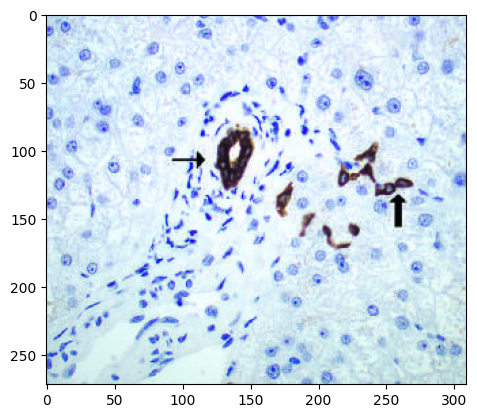

In [23]:
plt.imshow(image)

In [ ]:
python -m generativeimage2text.train -p "{'type': 'forward_backward_example', \
                'image_files': ['aux_data/images/1.jpg', 'aux_data/images/2.jpg'], \
                'prefixs': ['what is this?', 'how many trees?'], \
                'captions': ['several boats in a large body of water', '1'], \
            }"

# LXMERT

https://colab.research.google.com/drive/18TyuMfZYlgQ_nXo-tr8LCnzUaoX0KS-h?usp=sharing#scrollTo=D8J5XQql82um

In [28]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import torchvision.models as models
from transformers import LxmertForQuestionAnswering, LxmertTokenizer
from tqdm import tqdm

# Initialize the LXMERT model and tokenizer
model = LxmertForQuestionAnswering.from_pretrained("unc-nlp/lxmert-base-uncased").to('cuda')
tokenizer = LxmertTokenizer.from_pretrained("unc-nlp/lxmert-base-uncased")

# The rest of the code remains similar to the previous examples.


In [29]:
# Load a pre-trained ResNet model
resnet = models.resnet152(pretrained=True).to('cuda')
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])  # Remove the last fully connected layer
answers=[]
for i in tqdm(range(df.shape[0]), desc="Processing Images"):
    # Set the model to evaluation mode
    resnet.eval()

    # Load and preprocess an image
    file_path = df['File_Name'].tolist()[i]
    image = Image.open(file_path).convert("RGB")
    preprocess = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = preprocess(image).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        image_featuress = resnet(image.to('cuda')).view(1, 2048)

    question = df['Question'].tolist()[i]
    # Tokenize the question
    question_inputs = tokenizer(question, return_tensors="pt", max_length=20, padding="max_length", truncation=True).to('cuda')

    # Tokenize and prepare the LXMERT inputs
    inputs = {
        "input_ids": question_inputs["input_ids"].to('cuda'),
        "attention_mask": question_inputs["attention_mask"].to('cuda'),
        "visual_feats": image_featuress.to('cuda'),
        "visual_pos": torch.zeros(1, 36, 4).to('cuda'),  # Positional encodings for image regions
    }

    # Perform a forward pass through the LXMERT model
    with torch.no_grad():
        outputs = model(**inputs)


    # Extract the answer from the question_answering_score tensor
    answer_start_index = outputs.question_answering_score.argmax()
    answer = tokenizer.decode(answer_start_index)
    answers.append(answer)


Processing Images: 100%|█████████████████████████████████████████████████████████| 32632/32632 [35:22<00:00, 15.38it/s]


In [30]:
answers

['t i t l e',
 'f o r g o t',
 'f o r g o t',
 'r o l l i n g',
 '之',
 '之',
 'f o r g o t',
 'f o r g o t',
 'f o r g o t',
 'r o l l i n g',
 'c e n t e r s',
 'r o l l i n g',
 'r o l l i n g',
 'f o r g o t',
 'p r e s e r v e',
 'o l d e s t',
 '之',
 'f o r g o t',
 'r o l l i n g',
 '之',
 'o l d e s t',
 'f o r g o t',
 'f o r g o t',
 '[ u n u s e d 1 6 4 ]',
 'f o r g o t',
 'f o r g o t',
 'f o r g o t',
 'f o r g o t',
 'f o r g o t',
 'a f f e c t e d',
 '之',
 'f o r g o t',
 'r o l l i n g',
 '[ u n u s e d 1 6 4 ]',
 'r o l l i n g',
 'f o r g o t',
 'f o r g o t',
 '之',
 'f o r g o t',
 'r o l l i n g',
 'r o l l i n g',
 'o l d e s t',
 '1 9 1 9',
 'f o r g o t',
 'f o r g o t',
 'p r i n c e s s',
 'a f f e c t e d',
 'f o r g o t',
 'f o r g o t',
 'a r r a n g e m e n t s',
 '之',
 'f o r g o t',
 'r o l l i n g',
 'r o l l i n g',
 'f o r g o t',
 'r o l l i n g',
 'r o l l i n g',
 'r o l l i n g',
 'r o l l i n g',
 'r o l l i n g',
 'r o l l i n g',
 'f o r g o t',


In [31]:
df['LXMERT']=answers
df.to_csv(r'.\Data\metadata_pre.csv')